In [123]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
%aimport analysis
%aimport NV_generator
%aimport learning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
B_field = 0.0403555 # Teslas
gam_c = 67.262 * 10 ** 6 # Gyromagnetic ratio for a single c13 nucleus in rad s-1 T-1
ms = 1
omega_larmor = -1 * ms * gam_c * B_field

In [125]:
#A_rand, B_rand, r, costheta, sintheta = NV_generator.generate_spins(450, coupling_bound = 130 * 2 * np.pi * 1e3)

In [126]:
#np.savez("diamond_example.npz", A_rand = A_rand, B_rand = B_rand, r = r, costheta = costheta, sintheta = sintheta)

In [127]:
diamond = np.load("diamond_example.npz")
A_rand, B_rand, r, costheta, sintheta = diamond["A_rand"], diamond["B_rand"], diamond["r"], diamond["costheta"], diamond["sintheta"]

In [128]:
def data_func(N, tau, noise_level = .02):
    data = analysis.calc_M(A_rand, B_rand, N, omega_larmor, tau)
    noise = np.random.randn(len(data)) * noise_level
    return data + noise

In [129]:
N = 64
tau = analysis.choose_tau_params(N)
data = data_func(N, tau)
dip_inds, windows = analysis.find_resonances(data, fit_dips_below = None)
dip_scaler, dip_clf = learning.load_obj("pickles/dip_scaler_rbf"), learning.load_obj("pickles/dip_clf_rbf")

In [130]:
def classify_dii(dii):
    features = learning.dip_features(dii, dip_inds, data, tau, windows)
    return dip_clf.predict(dip_scaler.transform([features]))
clf_dii = filter(classify_dii, range(len(dip_inds)))

In [131]:
spin_dict = {}
print len(clf_dii)

365


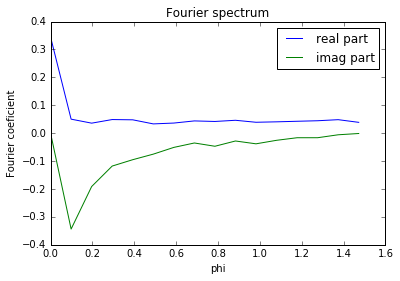

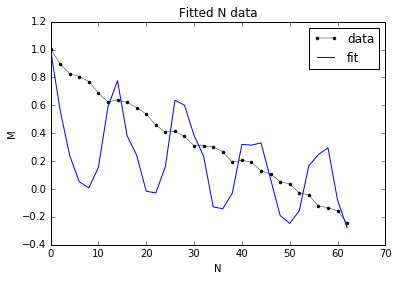

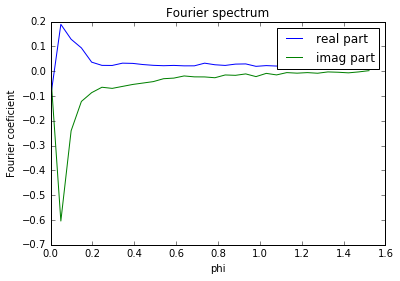

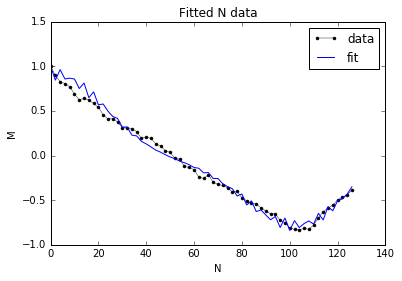

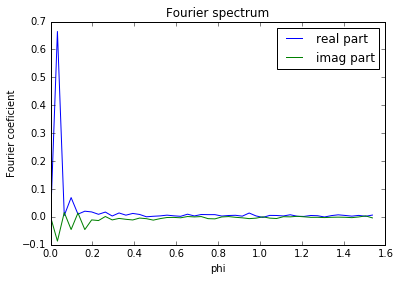

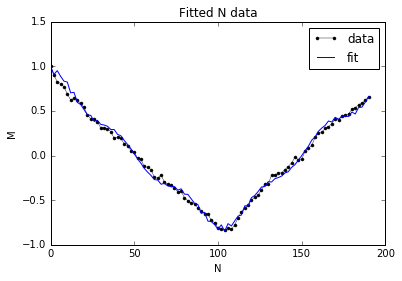

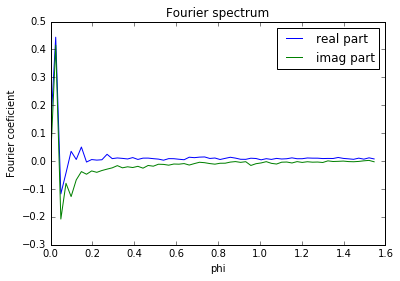

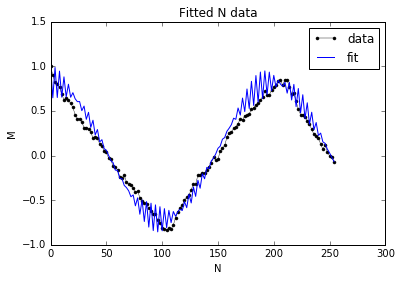

scaled_error <= error_tol:  False
scaled_error:  0.00272253304358
xs, phis, scaled_error:  [ 1.96968458  0.38038942  0.11952637  0.09043133] [ 0.03129776  0.12148907  0.03070389  1.3286172 ] 0.00272253304358


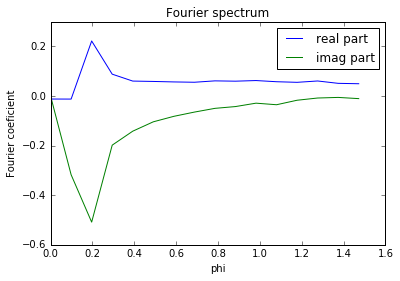

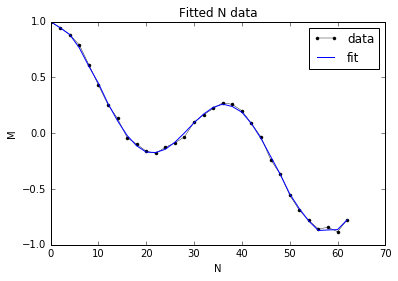

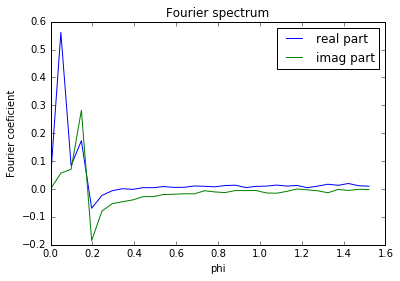

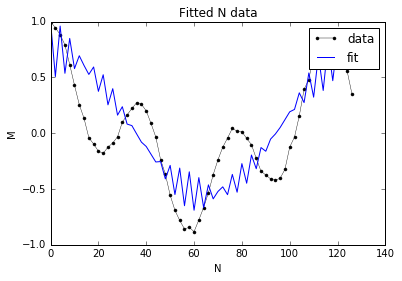

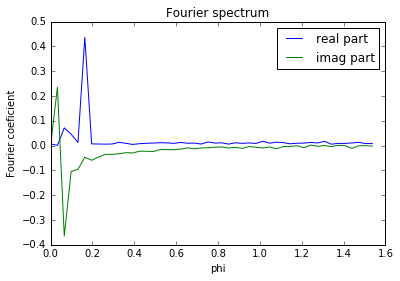

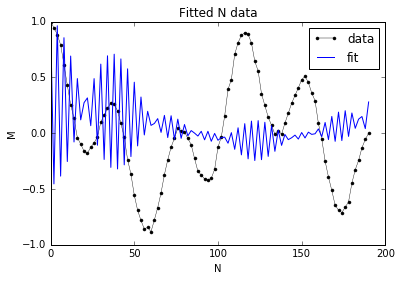

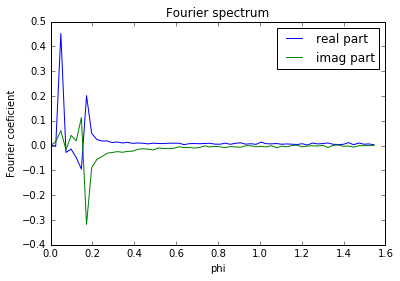

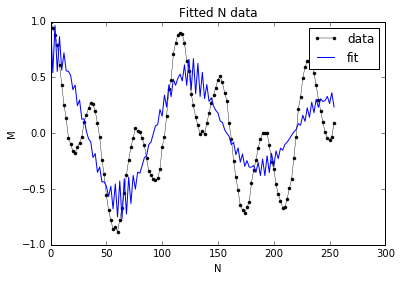

scaled_error <= error_tol:  True
scaled_error:  0.00039276682945
xs, phis, scaled_error:  [ 1.90516117  1.80981533  0.01501664] [ 0.05762451  0.10652917  1.26368004] 0.00039276682945


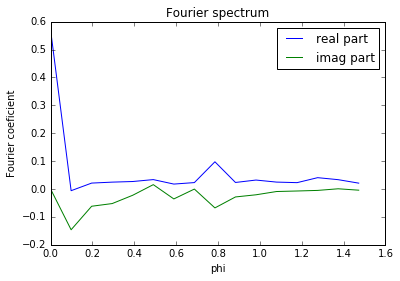

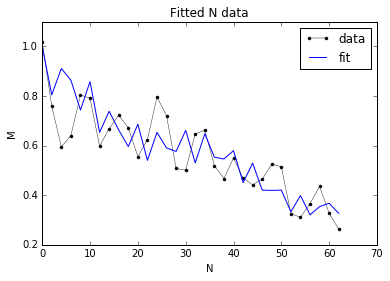

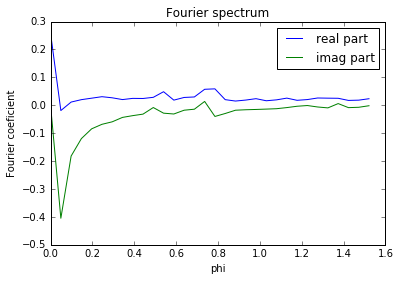

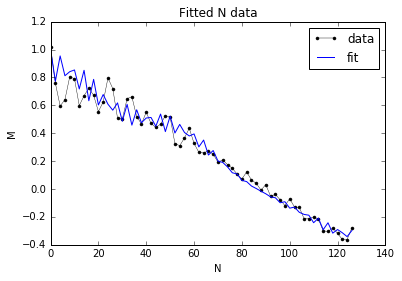

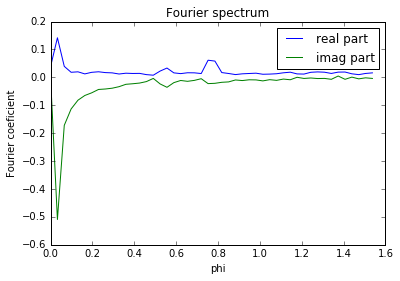

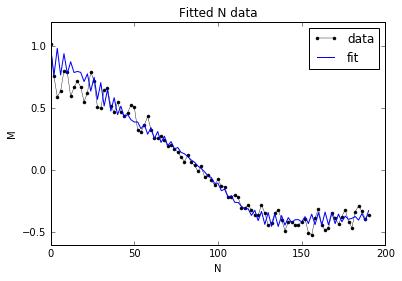

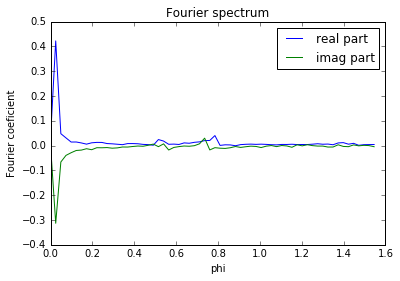

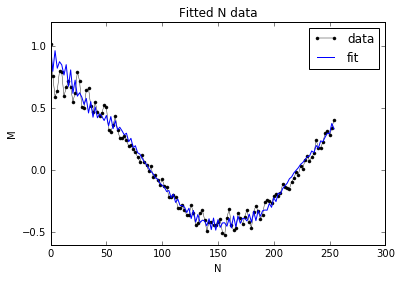

scaled_error <= error_tol:  False
scaled_error:  0.00507795888061
xs, phis, scaled_error:  [ 1.60918088  0.20450512  0.1795102   0.17220613] [ 0.0203116   1.39861327  0.06693105  0.09076124] 0.00507795888061


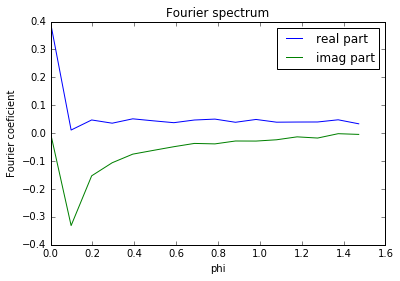

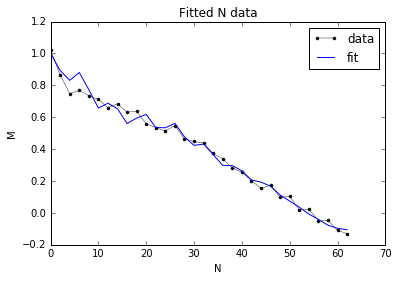

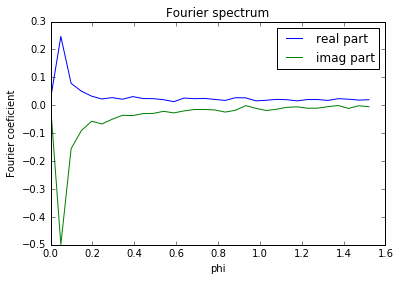

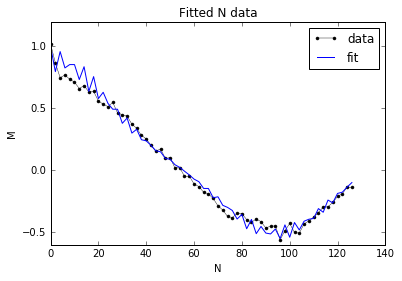

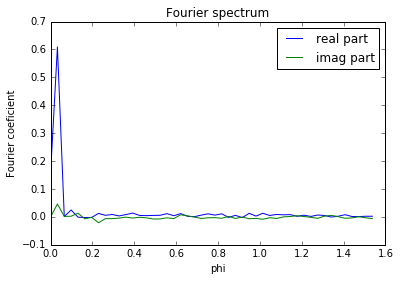

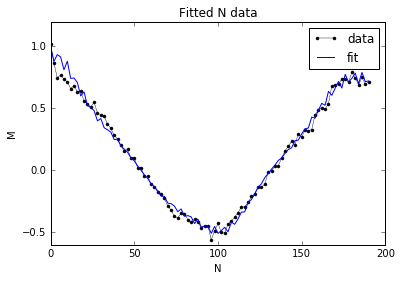

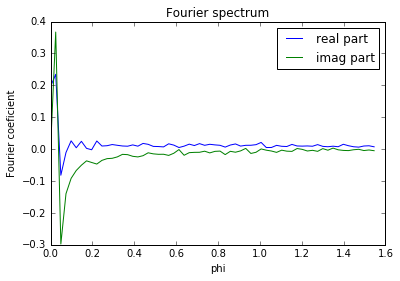

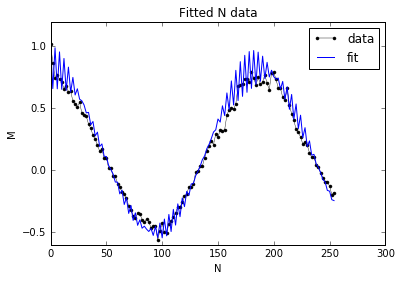

scaled_error <= error_tol:  False
scaled_error:  0.00246408012364
xs, phis, scaled_error:  [ 1.58640958  0.32244584  0.18750569  0.1247167 ] [ 0.03392481  0.06396857  0.11476948  1.2436276 ] 0.00246408012364


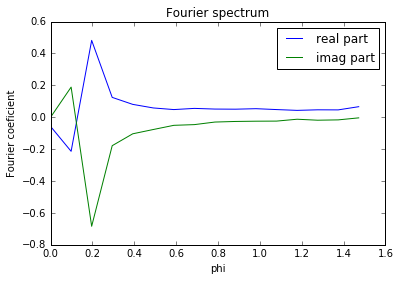

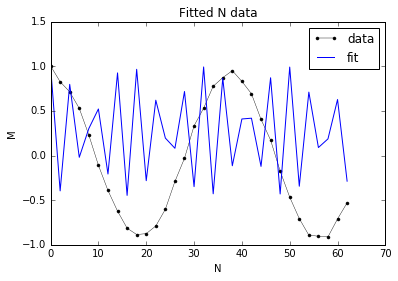

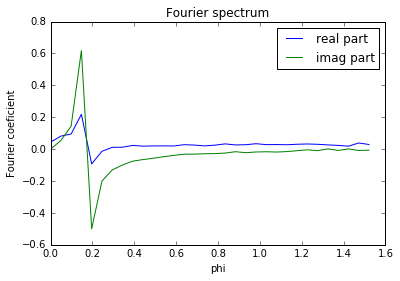

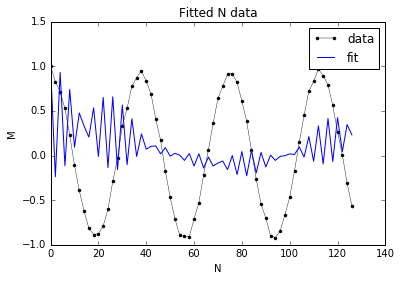

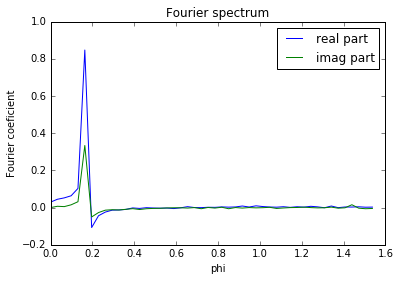

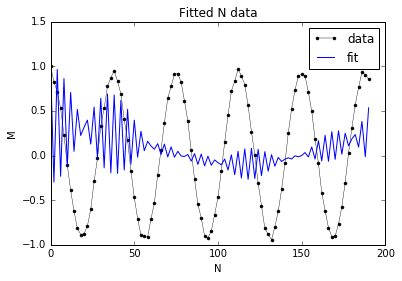

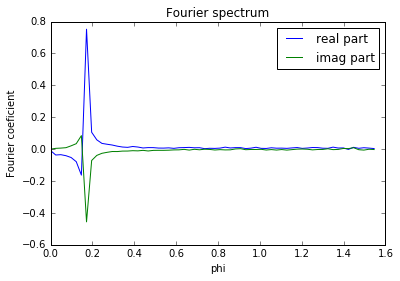

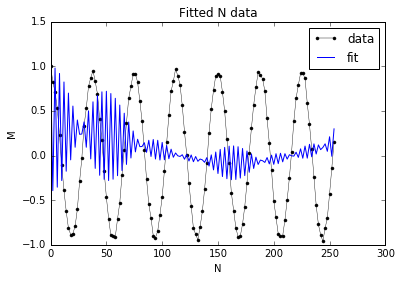

scaled_error <= error_tol:  False
scaled_error:  0.502588665514
xs, phis, scaled_error:  [ 1.39788917  1.27252874] [ 1.51280158  0.01897248] 0.502588665514


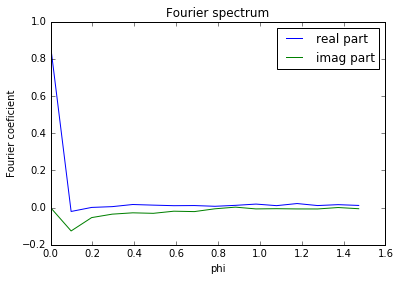

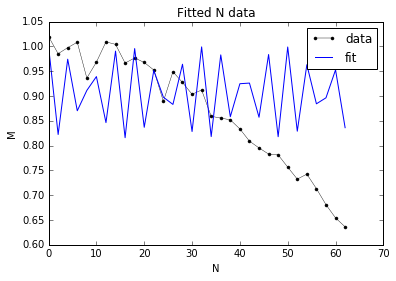

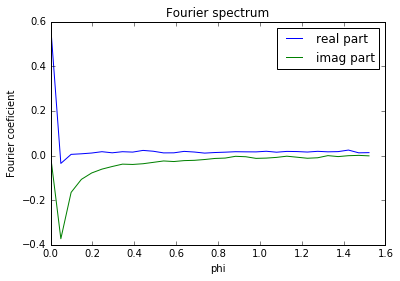

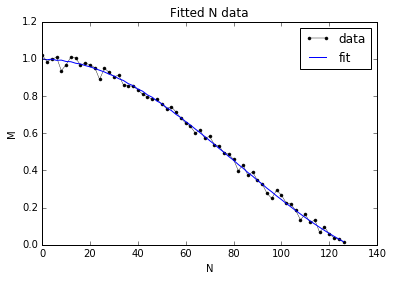

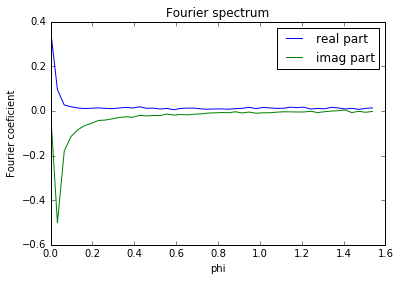

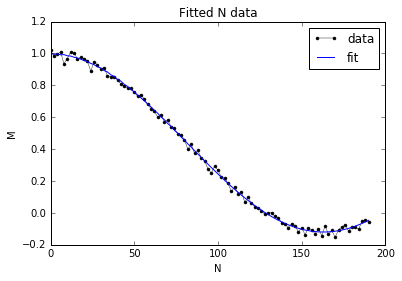

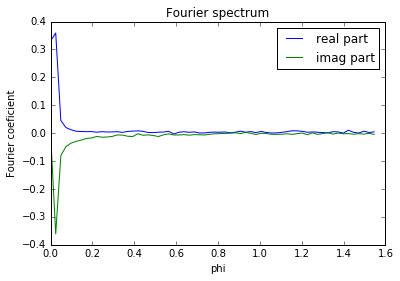

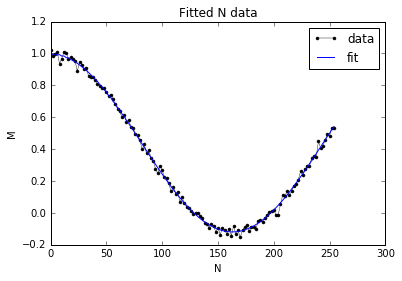

scaled_error <= error_tol:  True
scaled_error:  0.000368374889843
xs, phis, scaled_error:  [ 1.11946706  0.00630783] [ 0.01929086  1.51807547] 0.000368374889843


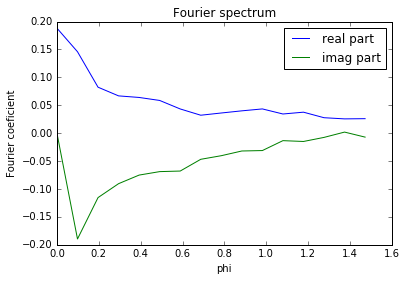

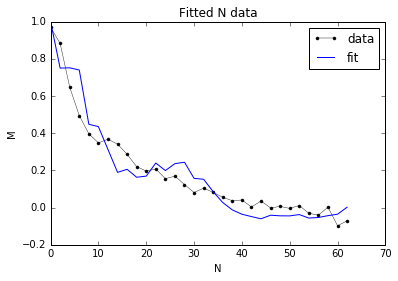

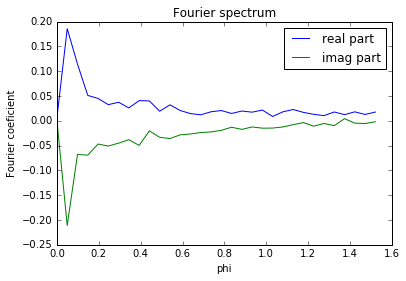

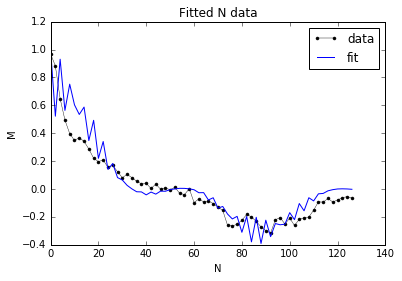

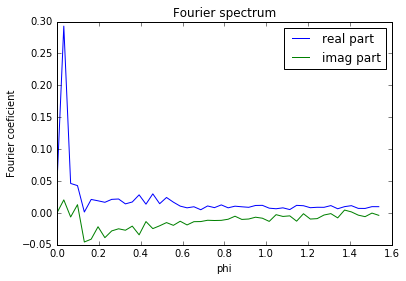

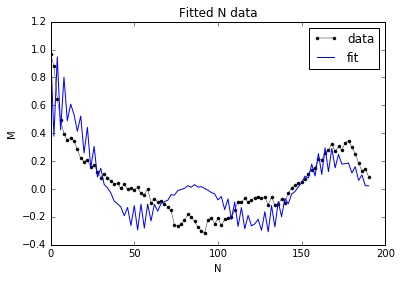

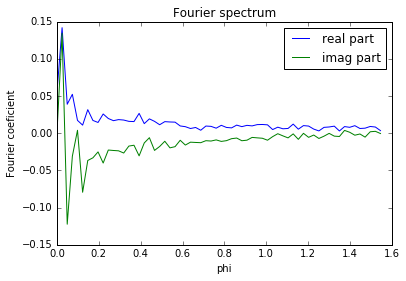

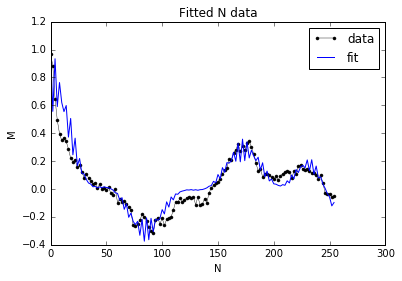

scaled_error <= error_tol:  False
scaled_error:  0.00776802074949
xs, phis, scaled_error:  [ 1.65571811  0.94752374  0.58211633  0.44874102] [ 0.03274265  0.07637547  0.02164131  1.42424654] 0.00776802074949


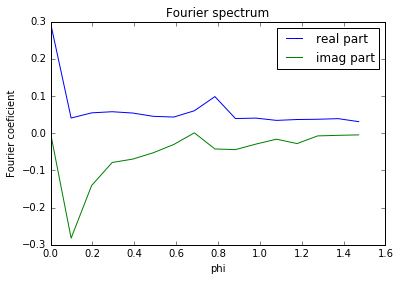

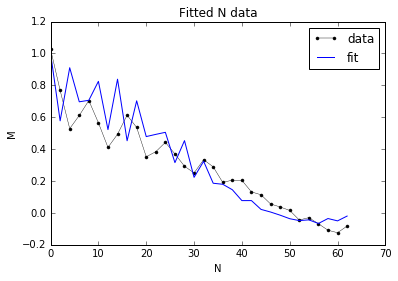

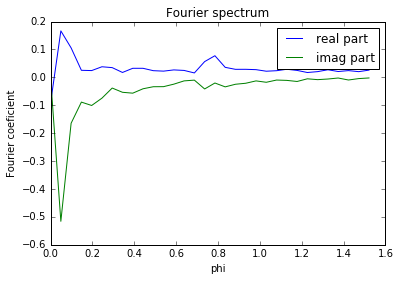

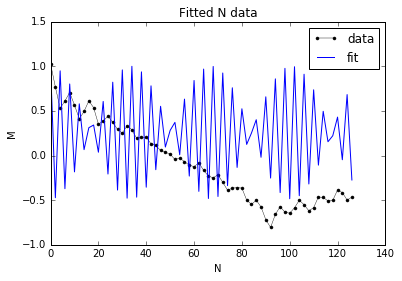

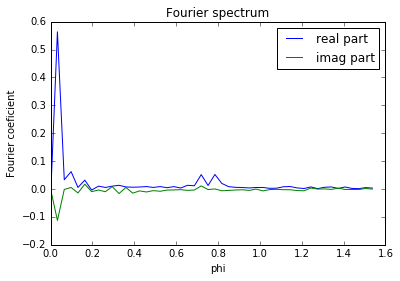

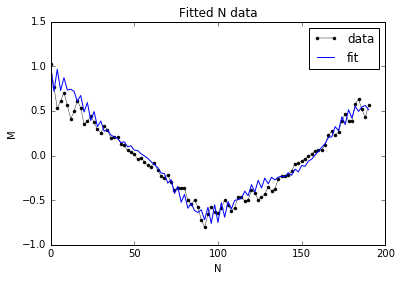

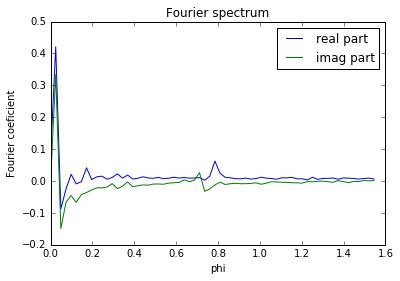

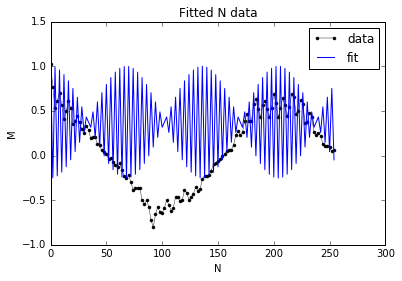

scaled_error <= error_tol:  False
scaled_error:  0.0147654426325
xs, phis, scaled_error:  [ 1.8632501   0.55841734  0.31203254] [ 0.02942196  0.06742173  1.44796686] 0.0147654426325


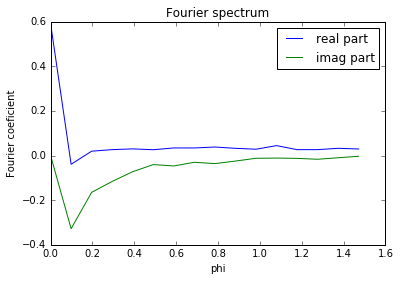

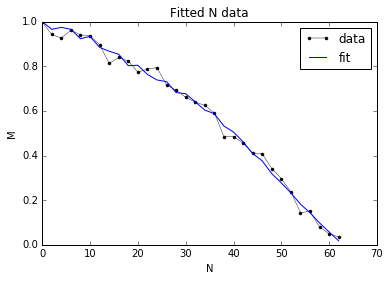

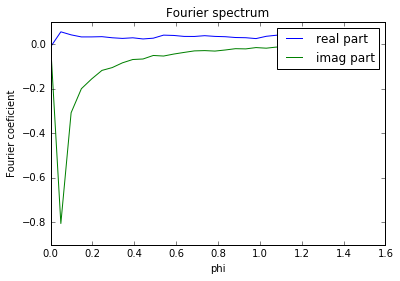

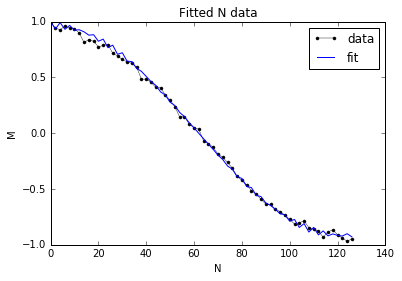

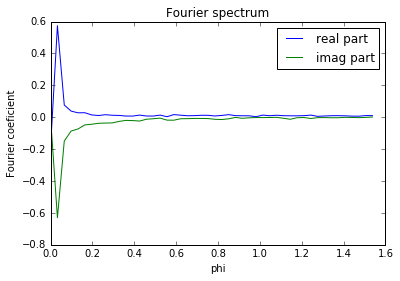

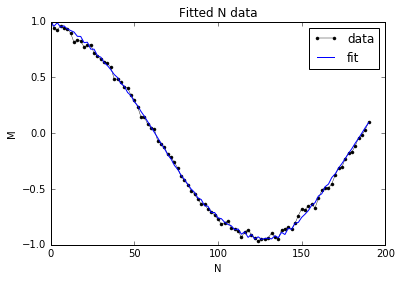

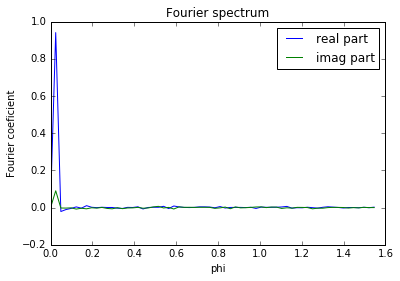

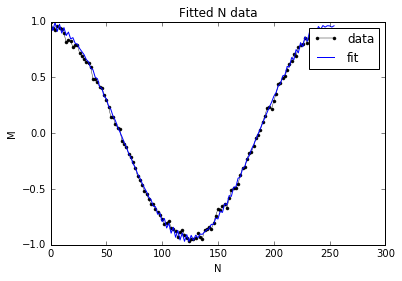

scaled_error <= error_tol:  True
scaled_error:  0.000783884166019
xs, phis, scaled_error:  [ 1.98986495  0.06593041  0.04067665] [ 0.02526641  0.08973161  1.43848278] 0.000783884166019


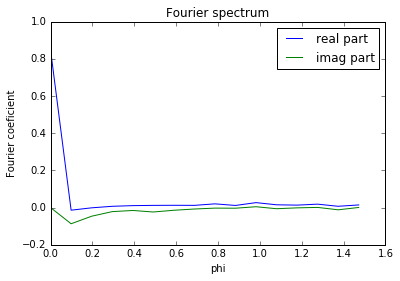

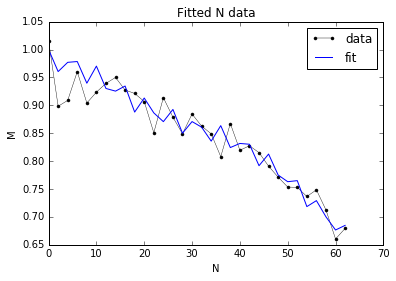

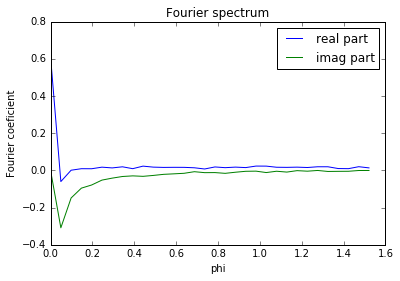

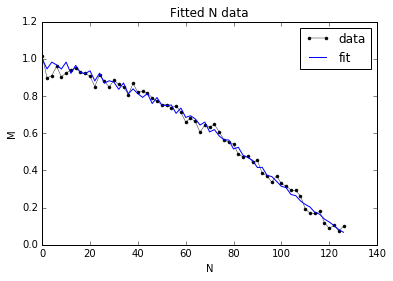

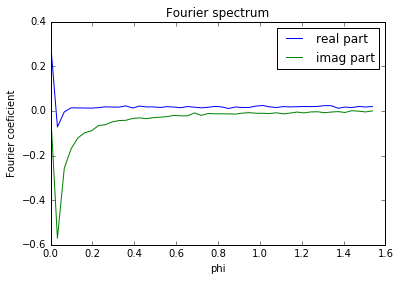

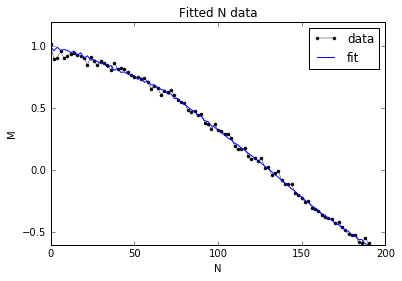

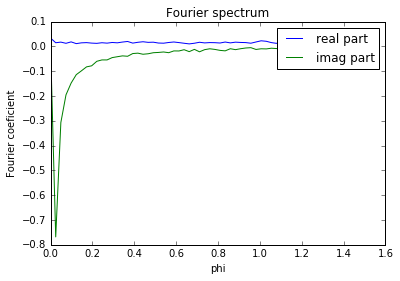

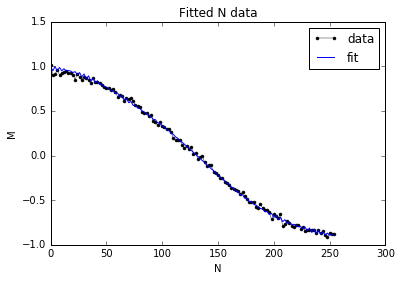

scaled_error <= error_tol:  True
scaled_error:  0.000750450992404
xs, phis, scaled_error:  [ 1.97242902  0.0678455   0.05173652] [ 0.01208212  0.04064367  1.47790142] 0.000750450992404


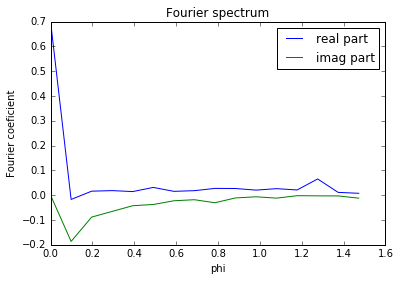

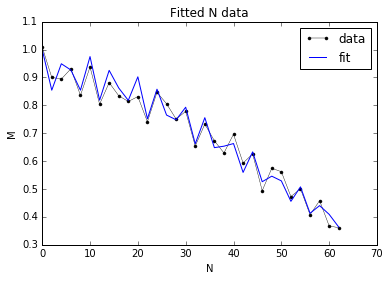

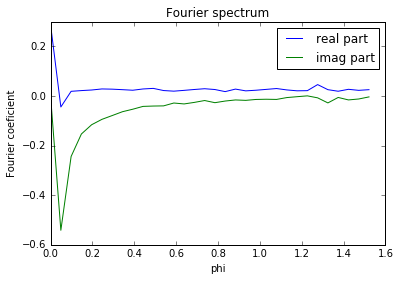

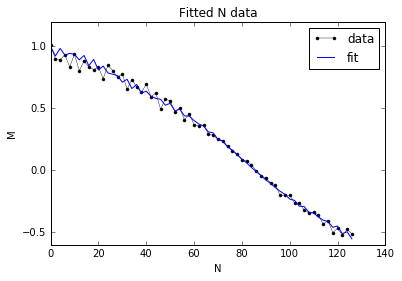

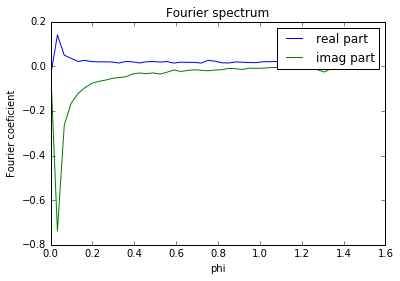

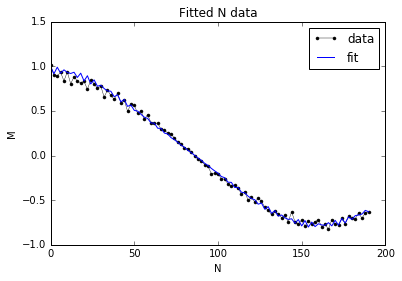

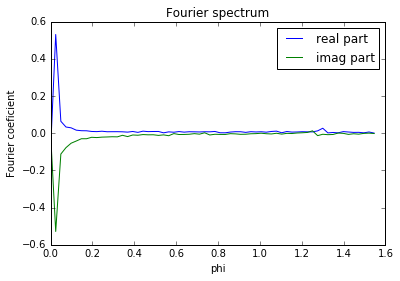

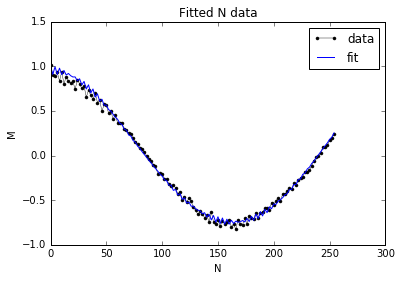

scaled_error <= error_tol:  True
scaled_error:  0.00138147384459
xs, phis, scaled_error:  [ 1.83486571  0.1090871   0.07261085] [ 0.01929474  0.081146    1.40446077] 0.00138147384459


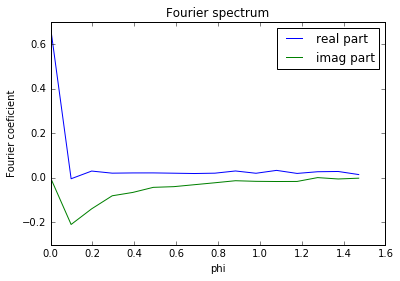

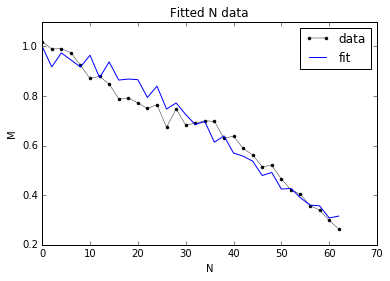

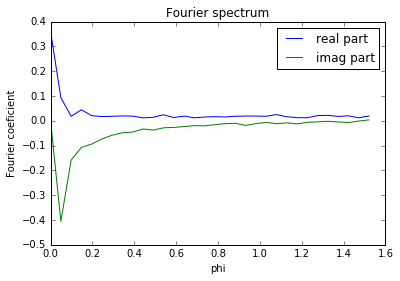

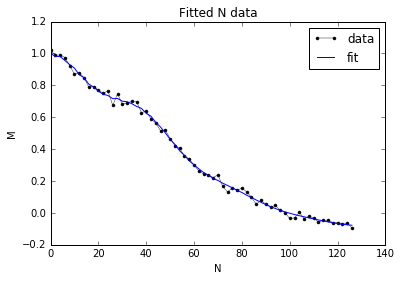

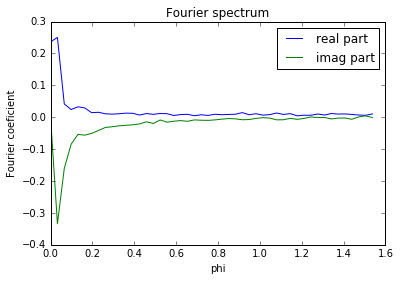

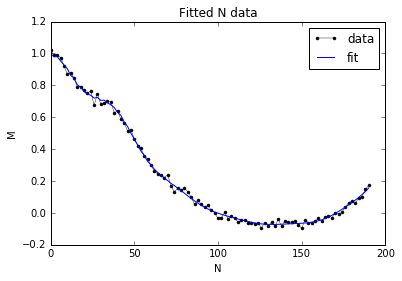

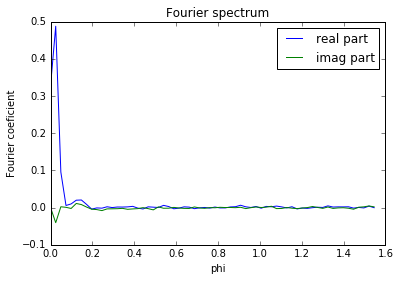

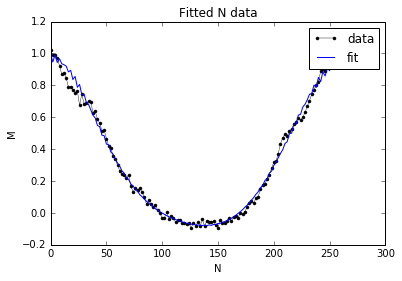

scaled_error <= error_tol:  True
scaled_error:  0.000271795840485
xs, phis, scaled_error:  [ 1.1949177   0.61569107  0.14103222  0.0106902 ] [ 0.02340678  0.02625765  0.15242772  1.34548596] 0.000271795840485


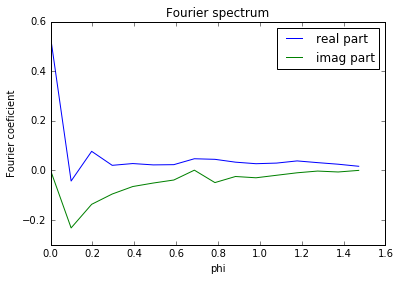

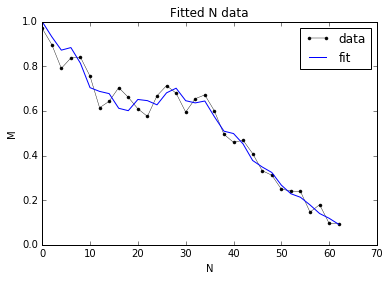

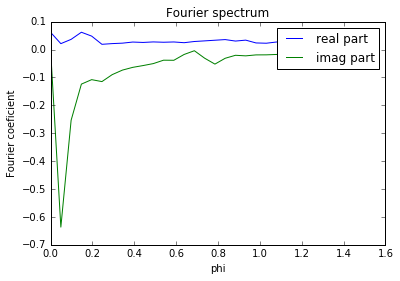

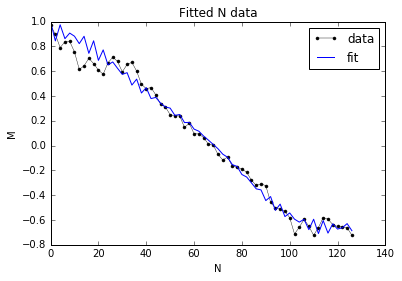

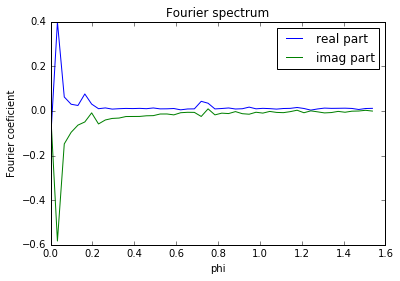

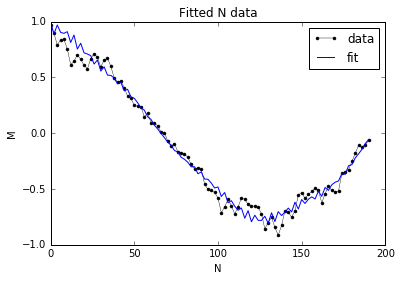

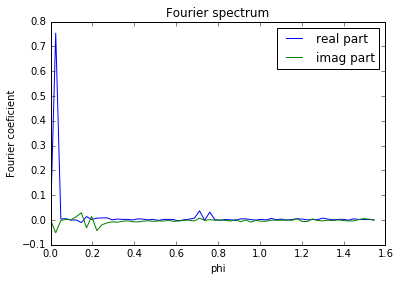

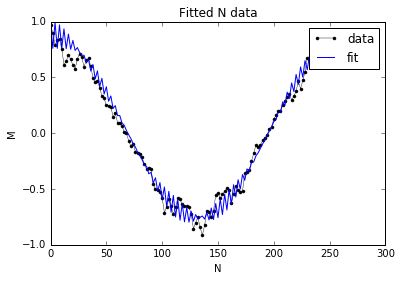

scaled_error <= error_tol:  False
scaled_error:  0.00560556520101
xs, phis, scaled_error:  [ 1.92746853  0.17453767  0.16332875  0.10300023] [ 0.02421875  0.03749258  0.10566042  1.35365549] 0.00560556520101


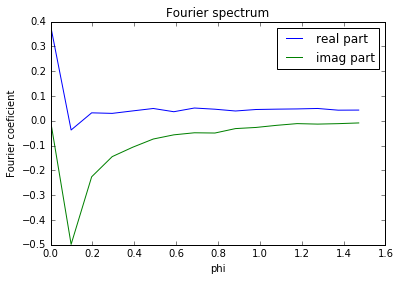

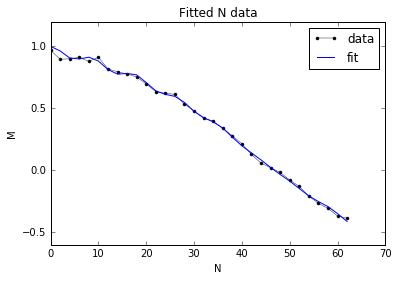

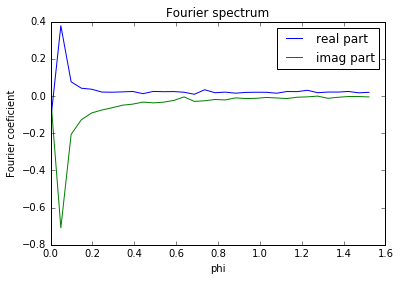

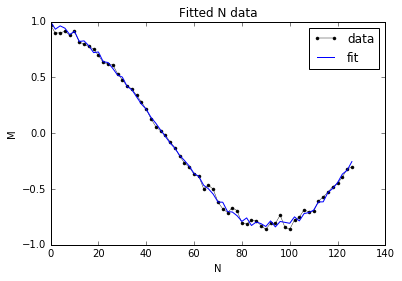

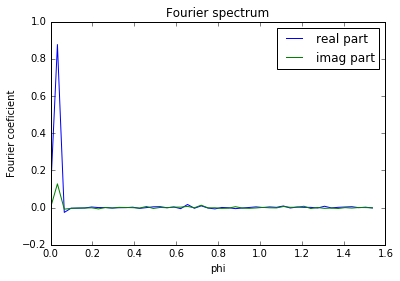

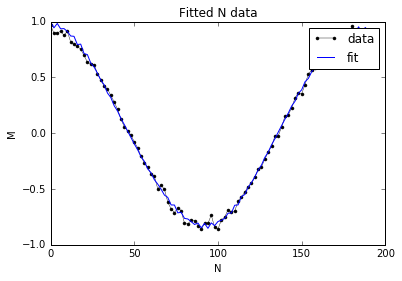

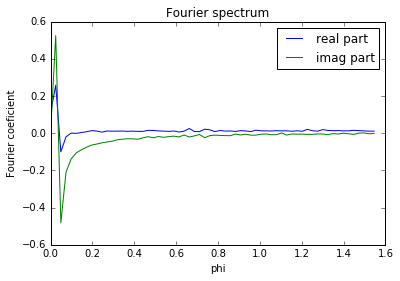

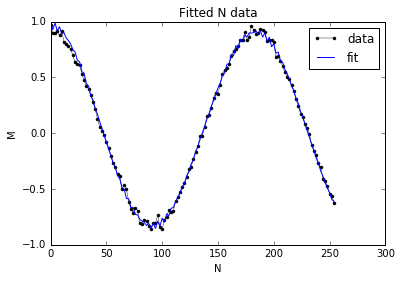

scaled_error <= error_tol:  True
scaled_error:  0.00109822444525
xs, phis, scaled_error:  [ 1.8971111   0.07074064  0.06510734] [ 0.03428014  1.47524587  3.12155058] 0.00109822444525


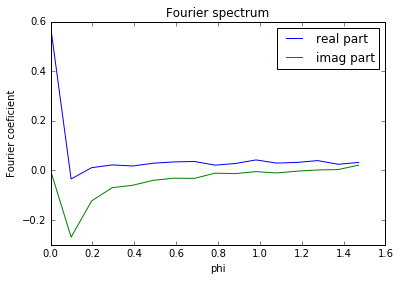

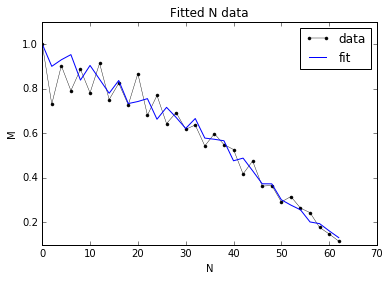

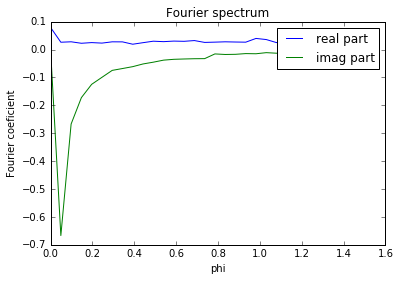

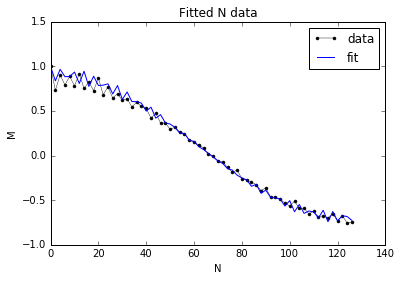

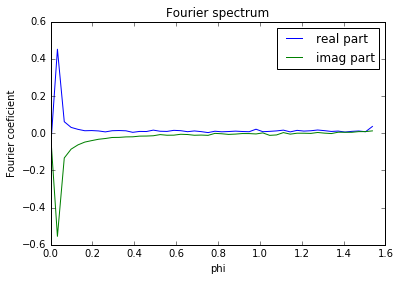

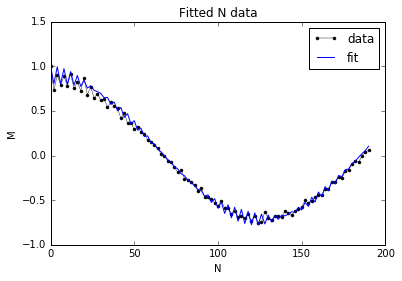

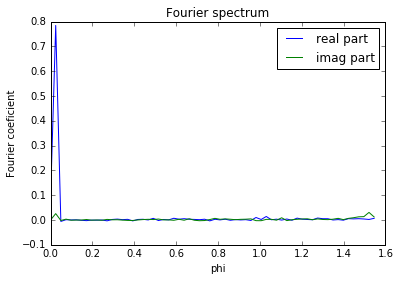

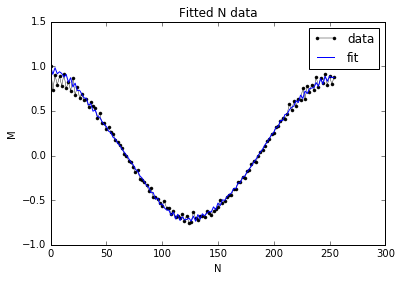

scaled_error <= error_tol:  False
scaled_error:  0.00227093493623
xs, phis, scaled_error:  [ 1.79889768  0.09254559  0.09202704  0.08605735] [ 0.02471695  0.0656577   1.40301142  0.04924919] 0.00227093493623


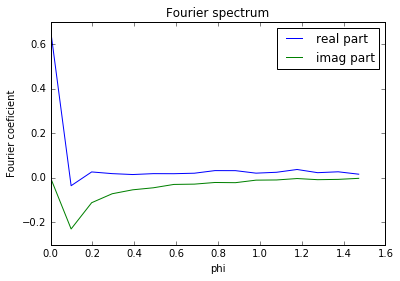

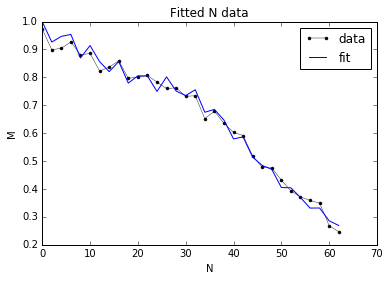

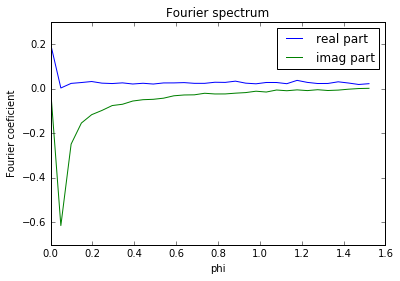

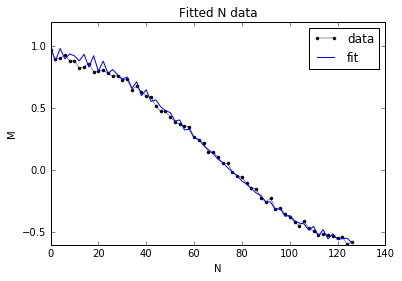

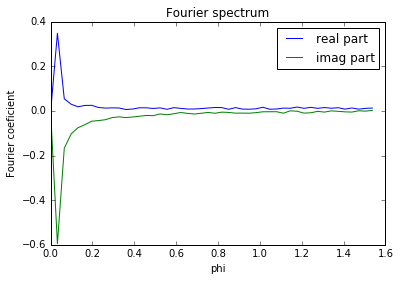

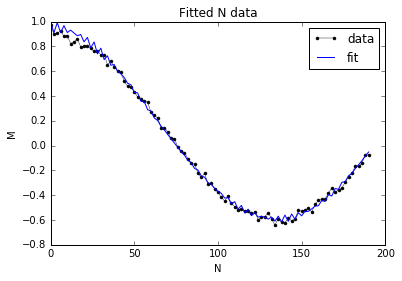

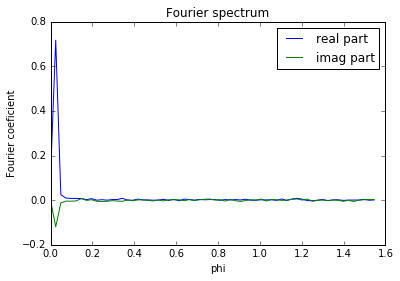

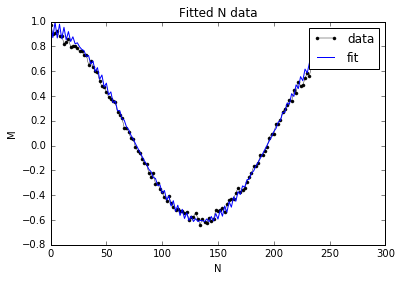

scaled_error <= error_tol:  False
scaled_error:  0.00160350640684
xs, phis, scaled_error:  [ 1.64878419  0.12873854] [ 0.02320306  1.51268937] 0.00160350640684


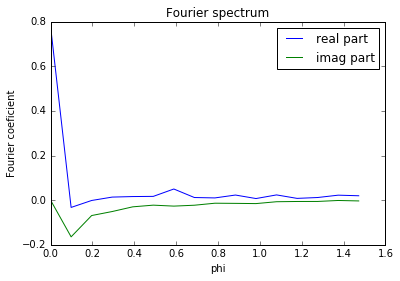

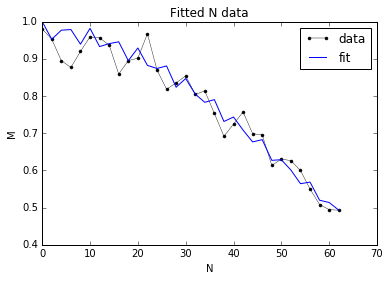

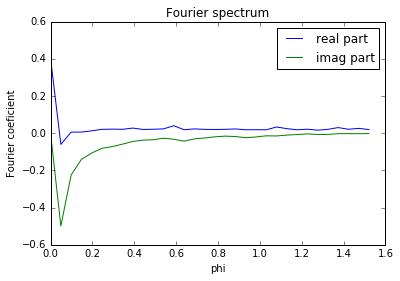

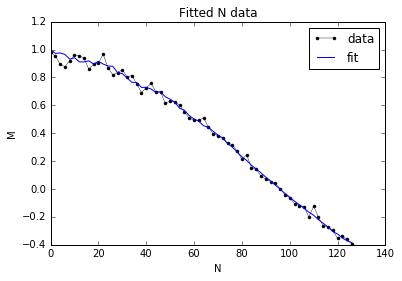

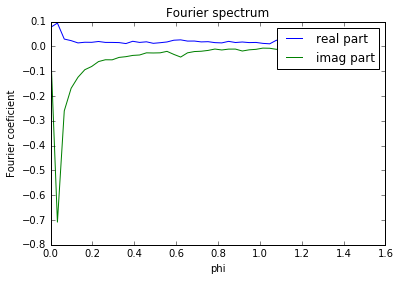

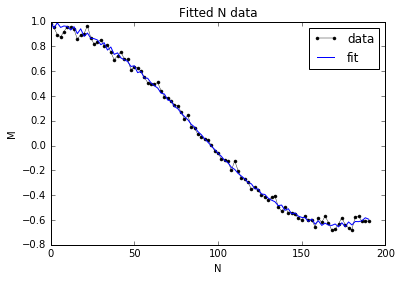

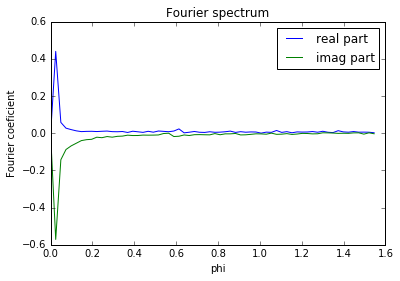

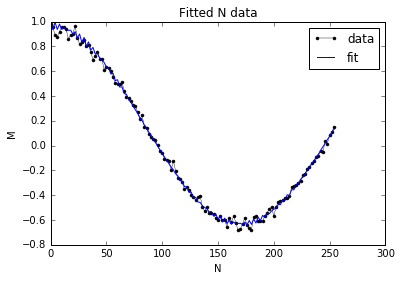

scaled_error <= error_tol:  True
scaled_error:  0.000887246500437
xs, phis, scaled_error:  [ 1.67547294  0.06456352  0.03704032] [ 0.0184595   1.46824388  0.01756557] 0.000887246500437


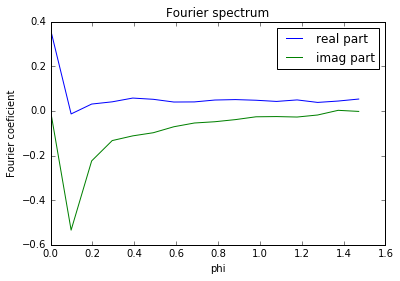

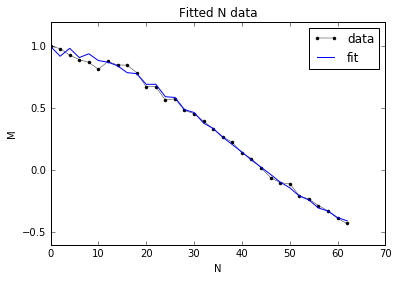

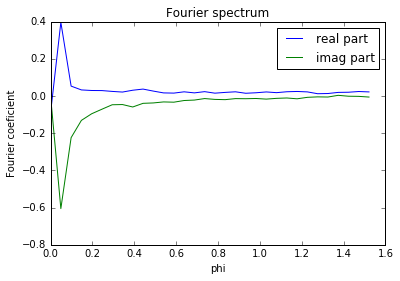

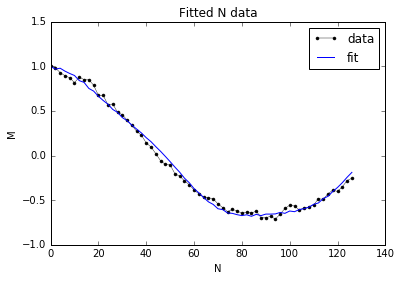

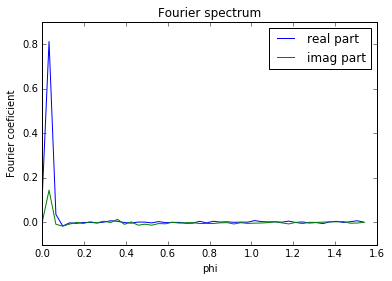

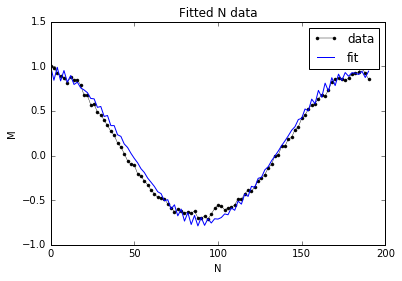

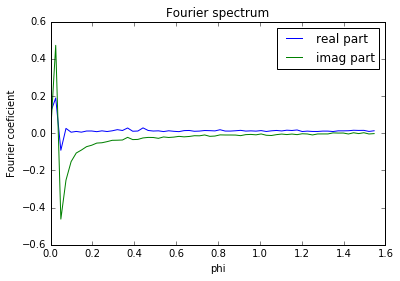

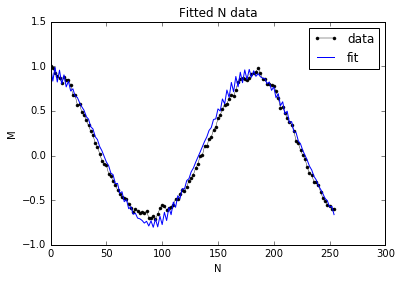

scaled_error <= error_tol:  False
scaled_error:  0.00220867138359
xs, phis, scaled_error:  [ 1.84780723  0.19390624  0.05111811] [ 0.03479111  0.10070877  1.35081803] 0.00220867138359


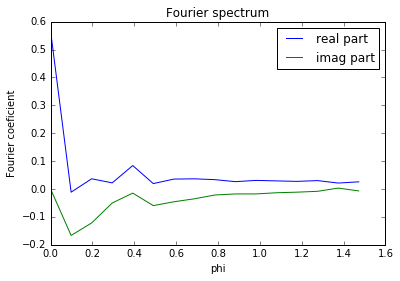

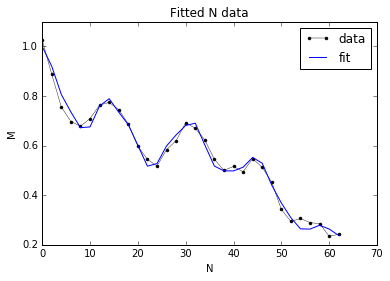

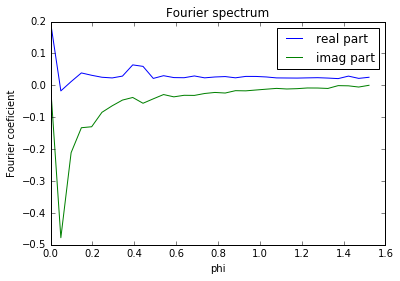

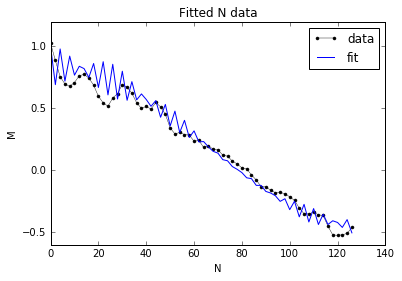

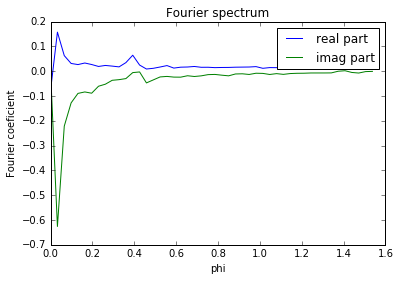

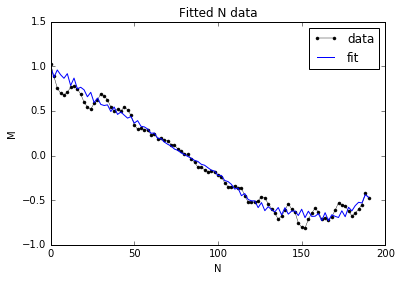

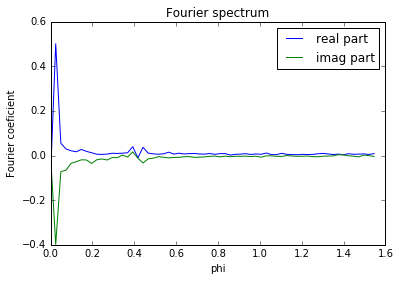

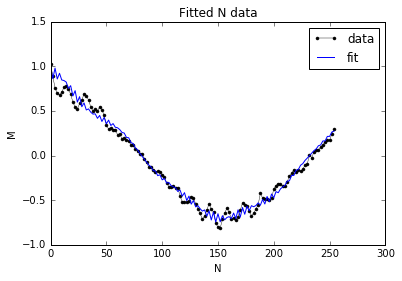

scaled_error <= error_tol:  False
scaled_error:  0.004872597565
xs, phis, scaled_error:  [ 1.88223674  0.20303189  0.15660606  0.13899109] [ 0.02003828  0.08694475  0.06846866  1.44215227] 0.004872597565


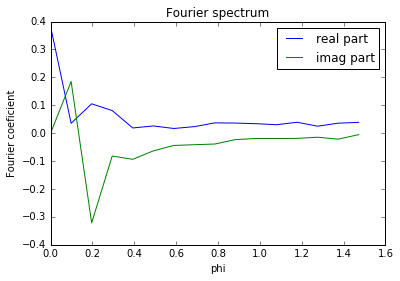

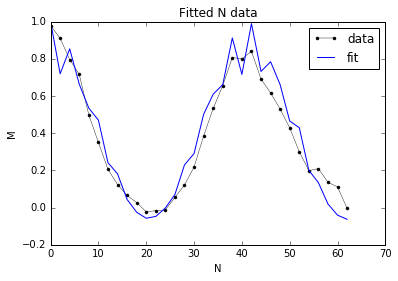

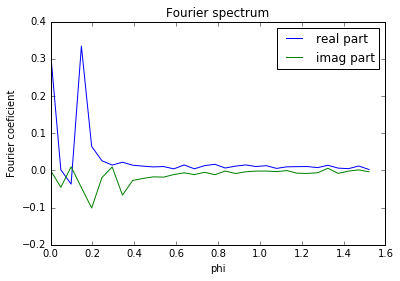

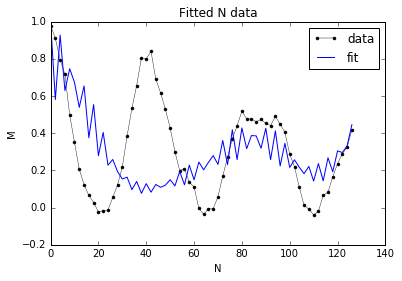

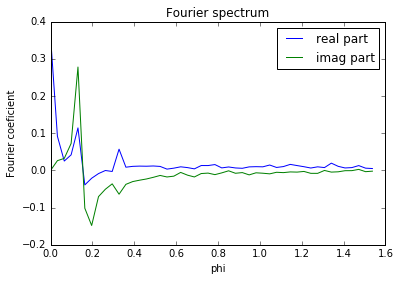

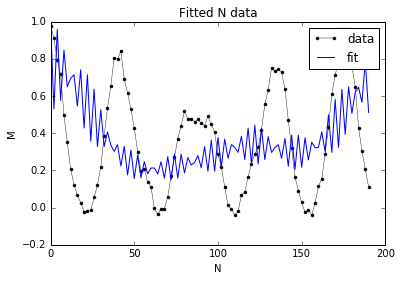

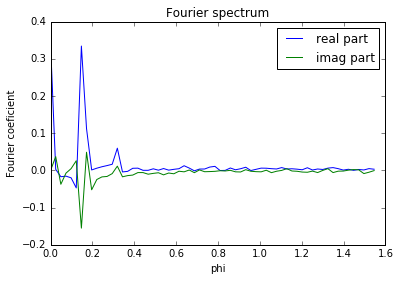

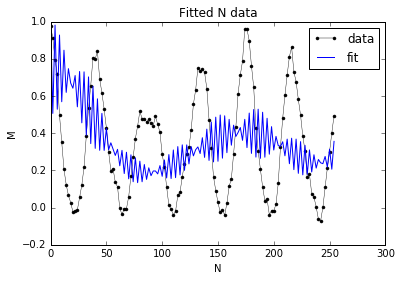

scaled_error <= error_tol:  False
scaled_error:  0.100375234962
xs, phis, scaled_error:  [ 0.63788624  0.49640135  0.49274422] [ 0.0388955   1.48657837  0.02201233] 0.100375234962


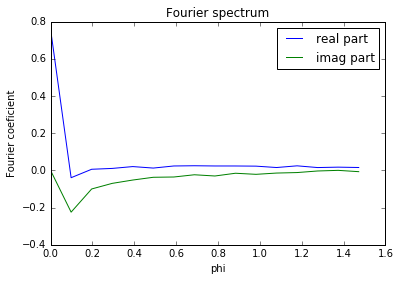

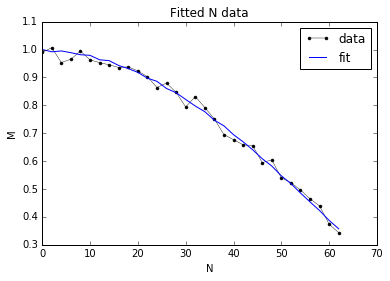

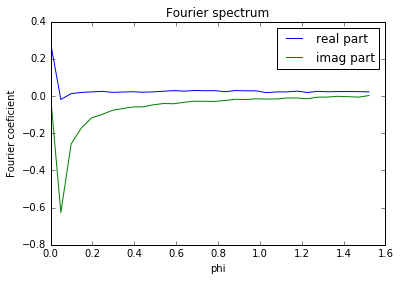

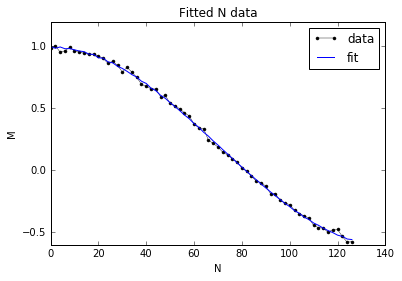

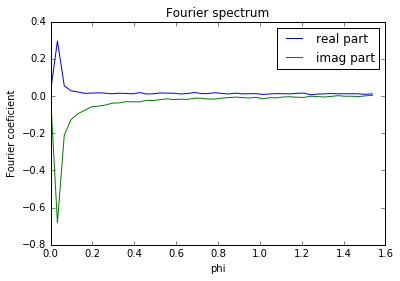

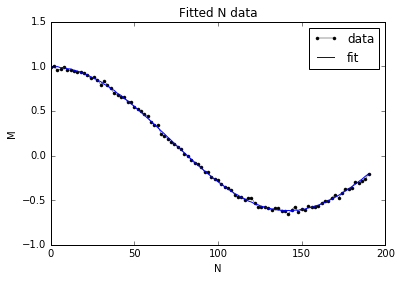

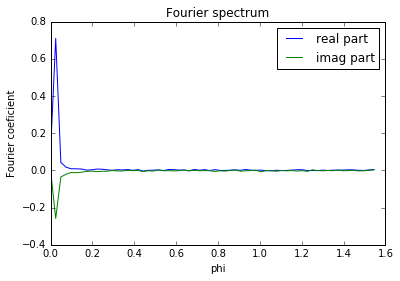

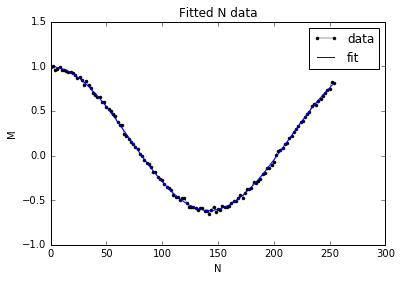

scaled_error <= error_tol:  True
scaled_error:  0.000291211720228
xs, phis, scaled_error:  [ 1.62843188  0.01895861  0.01055004  0.00502303] [ 0.02208029  0.01704729  1.41894741  0.04477367] 0.000291211720228


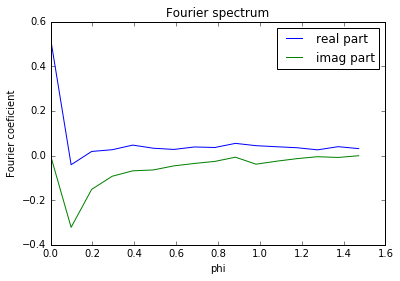

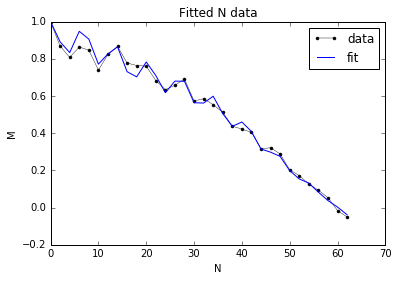

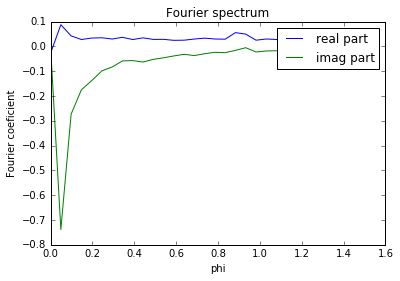

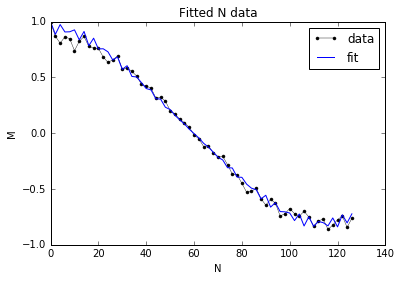

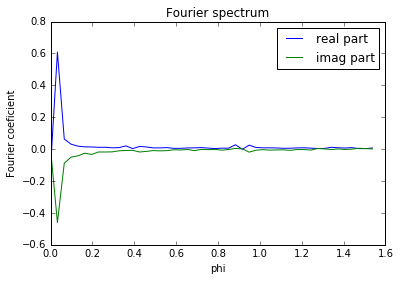

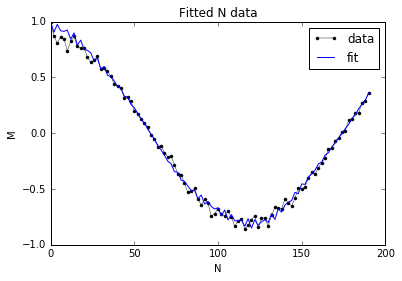

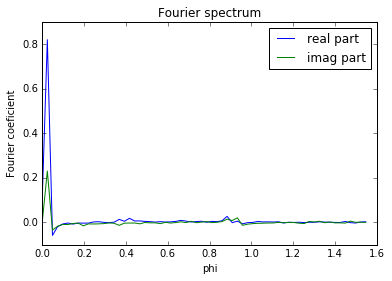

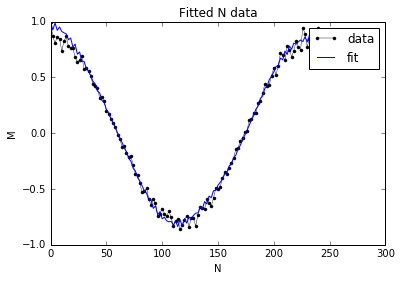

scaled_error <= error_tol:  False
scaled_error:  0.00242153932117
xs, phis, scaled_error:  [ 1.93846547  0.09401777  0.08447546  0.07713921] [ 0.02688842  3.12217012  1.36038526  0.09325903] 0.00242153932117


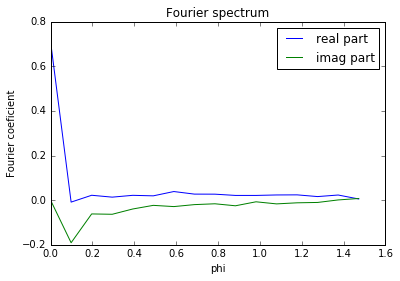

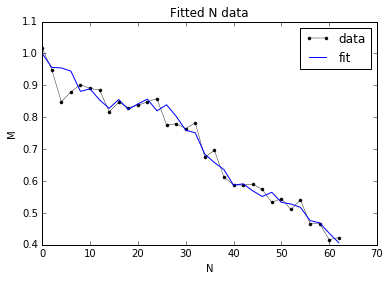

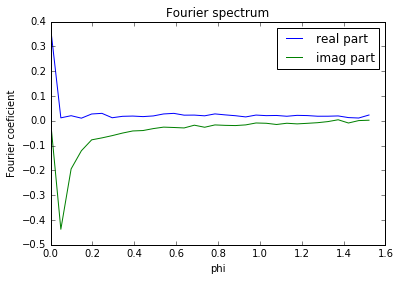

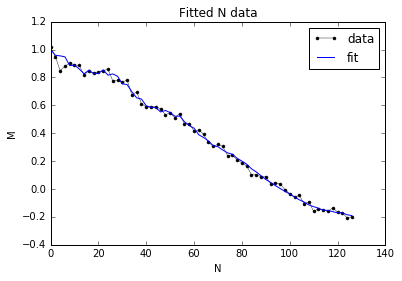

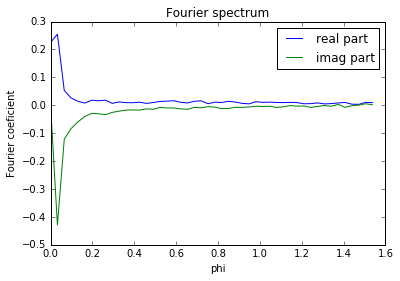

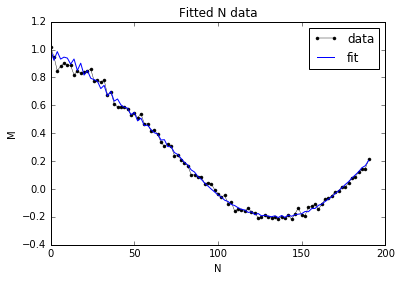

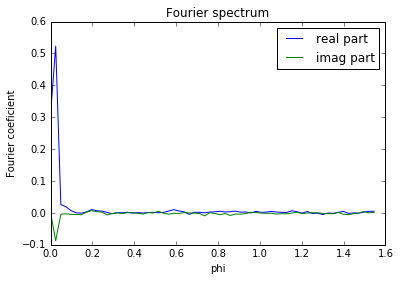

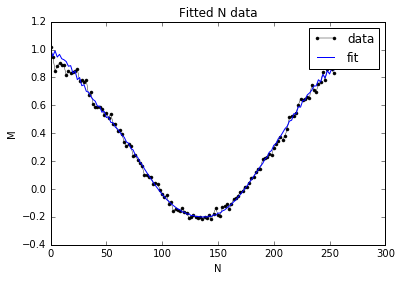

scaled_error <= error_tol:  True
scaled_error:  0.000933756550142
xs, phis, scaled_error:  [ 1.2348846   0.08153029  0.07943725  0.04778176] [ 0.02325708  0.07849781  0.06624799  1.44262586] 0.000933756550142


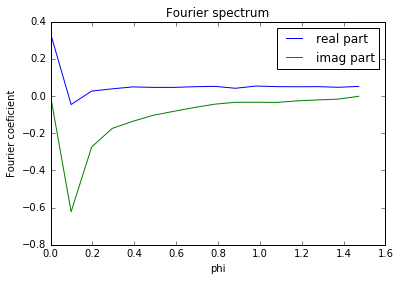

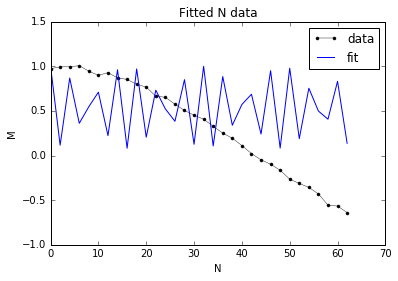

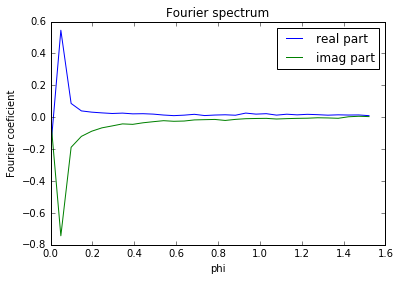

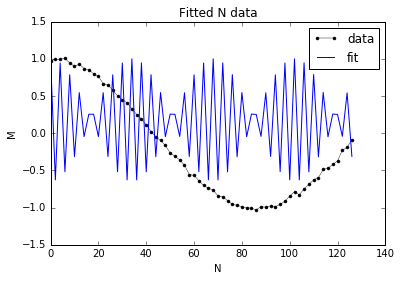

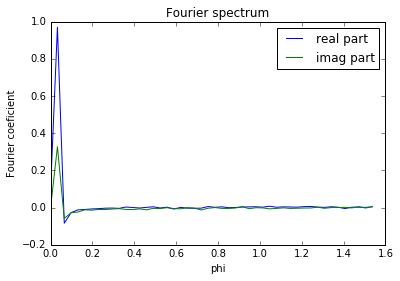

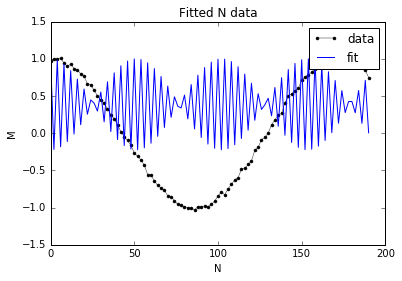

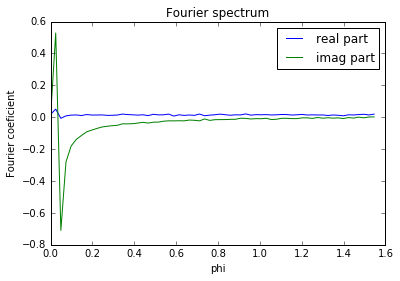

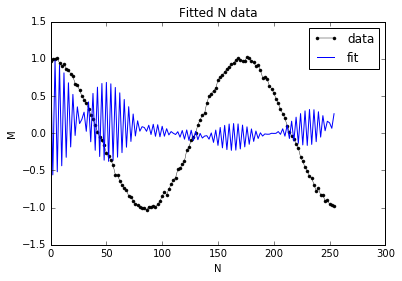

scaled_error <= error_tol:  False
scaled_error:  0.591161107589
xs, phis, scaled_error:  [ 1.5656399   1.24169878] [ 1.51414218  0.02021386] 0.591161107589


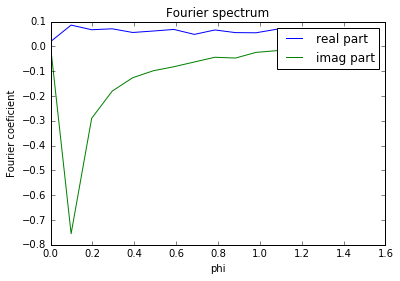

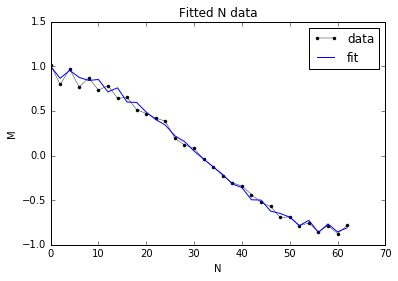

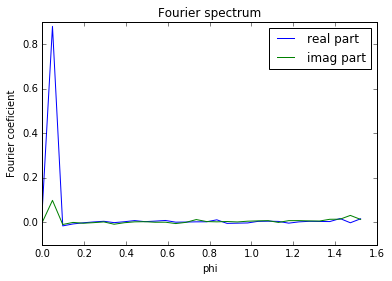

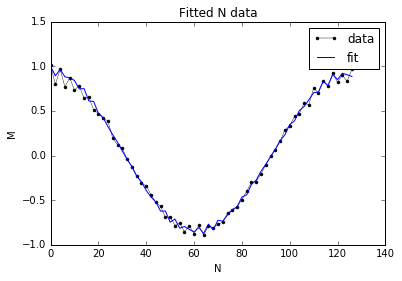

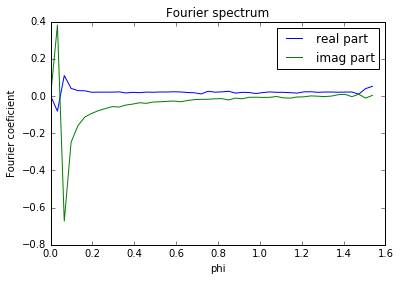

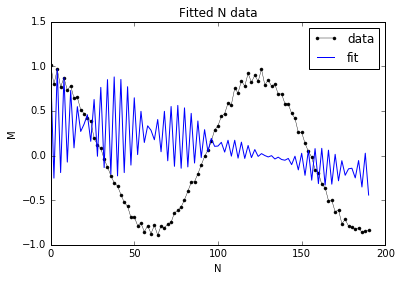

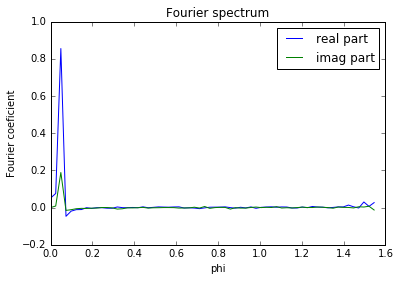

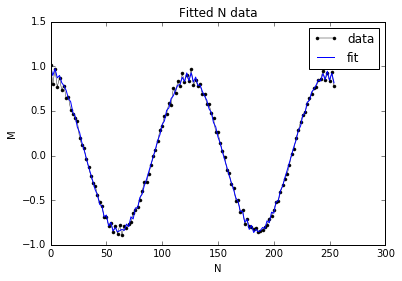

scaled_error <= error_tol:  True
scaled_error:  0.0012644884632
xs, phis, scaled_error:  [ 1.95384242  0.10165126  0.05562141  0.05170273] [ 0.05083562  1.44497116  0.0216668   3.10035308] 0.0012644884632


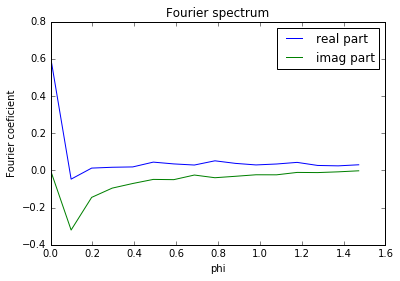

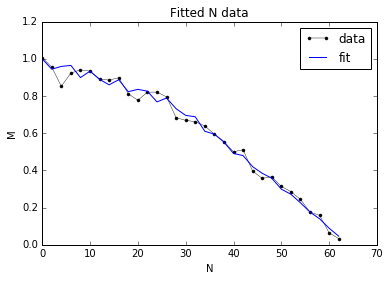

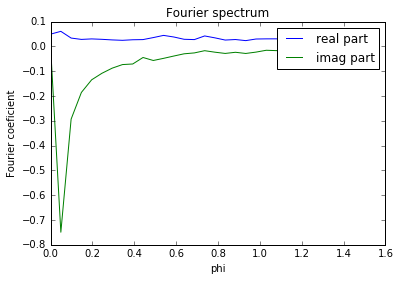

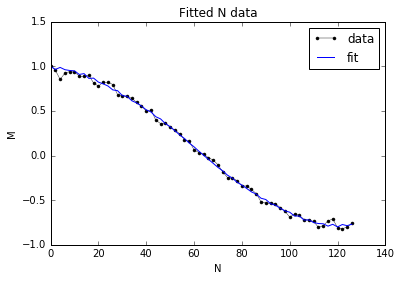

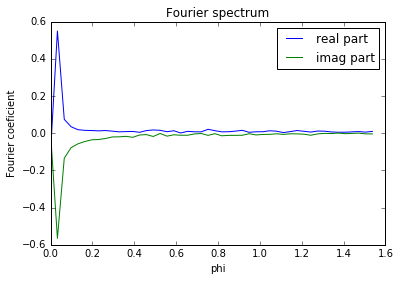

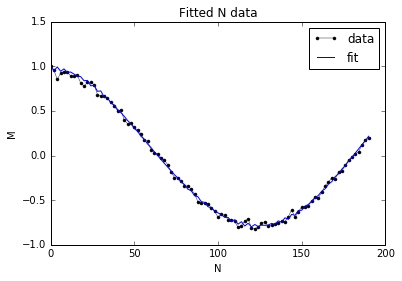

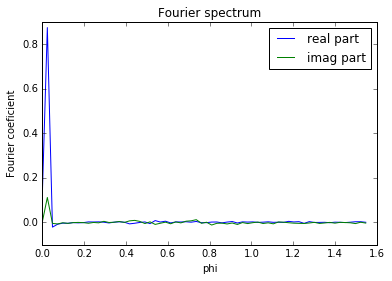

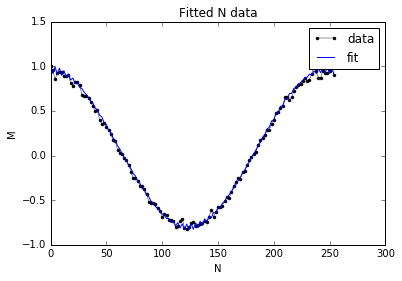

scaled_error <= error_tol:  True
scaled_error:  0.00108244121231
xs, phis, scaled_error:  [ 1.85749354  0.06796406  0.05323005] [ 0.02556982  0.03327981  1.46558665] 0.00108244121231


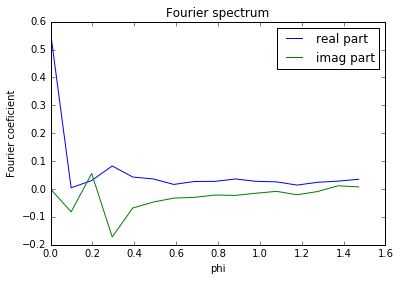

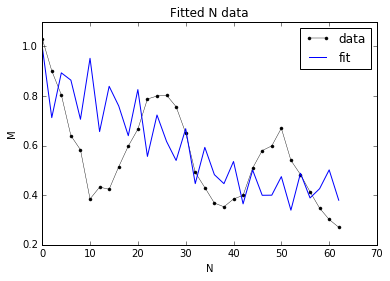

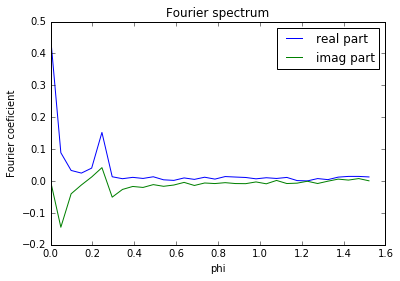

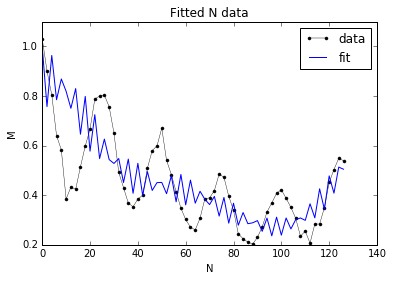

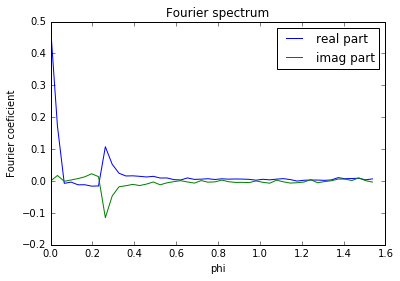

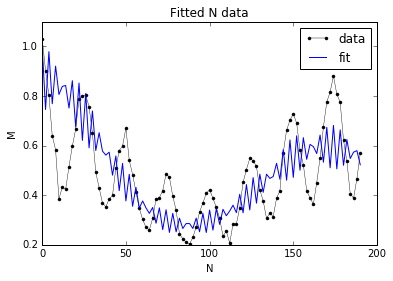

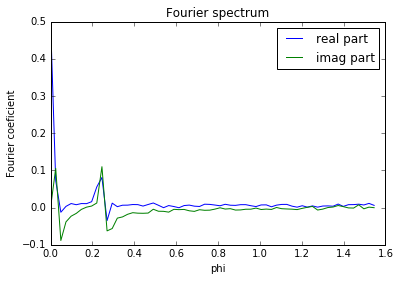

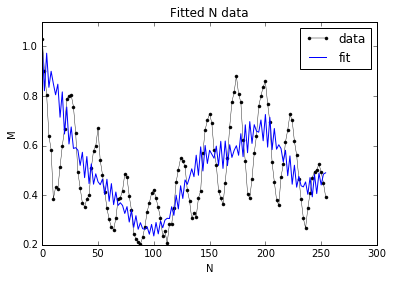

scaled_error <= error_tol:  False
scaled_error:  0.0214077838813
xs, phis, scaled_error:  [ 0.49303696  0.38350347  0.19508378  0.18090468] [ 0.02913422  0.04069434  0.09257166  1.41583516] 0.0214077838813


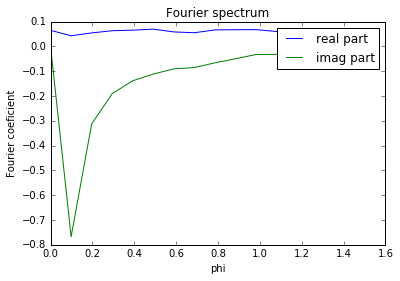

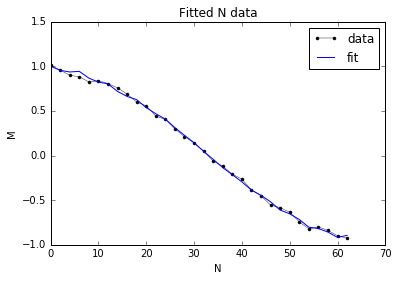

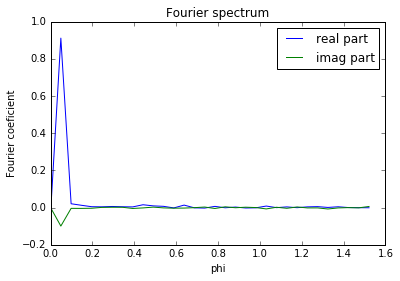

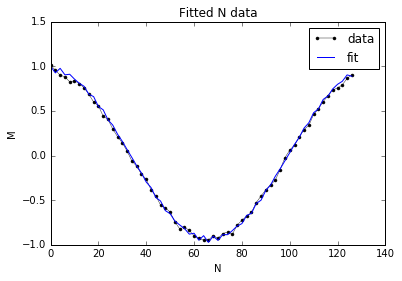

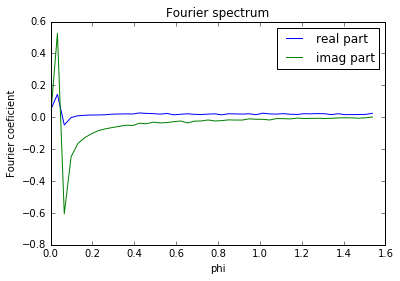

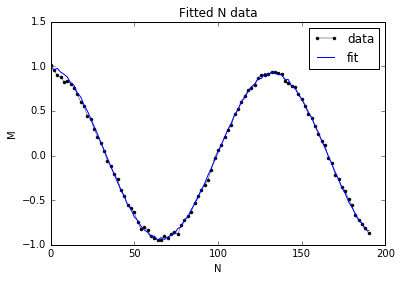

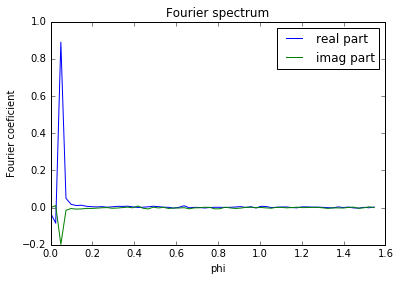

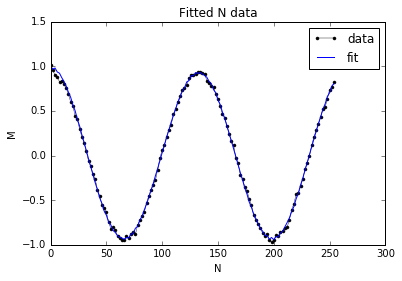

scaled_error <= error_tol:  True
scaled_error:  0.000667903081241
xs, phis, scaled_error:  [ 1.99072153  0.04766065  0.0329068   0.02858132] [ 0.04742506  0.02000227  0.03615499  1.44424166] 0.000667903081241


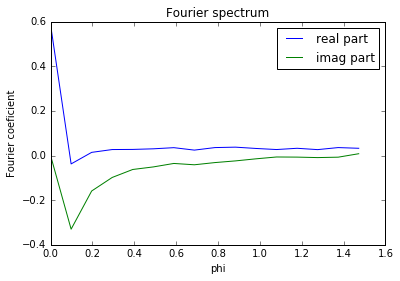

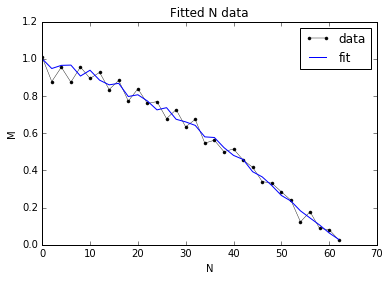

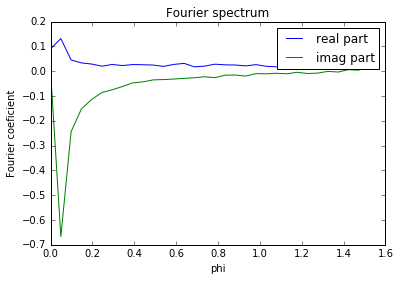

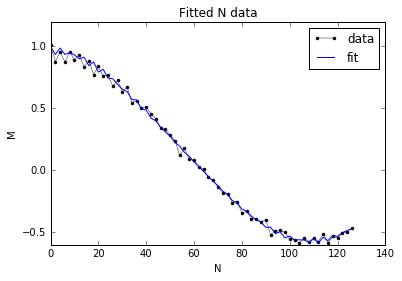

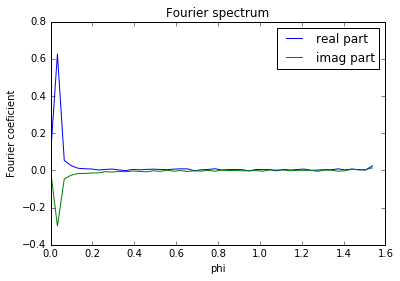

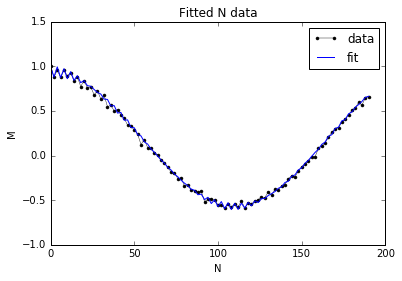

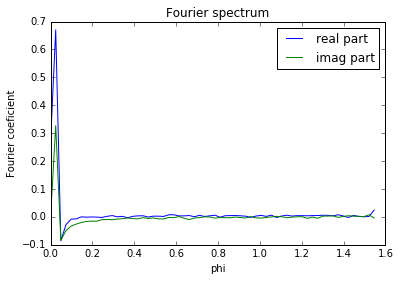

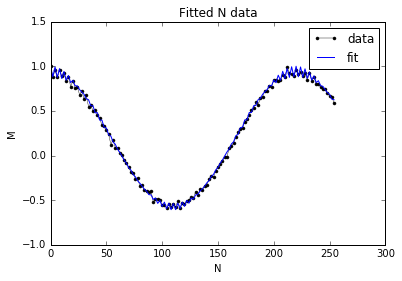

scaled_error <= error_tol:  True
scaled_error:  0.000839056654624
xs, phis, scaled_error:  [ 1.60830952  0.11735317] [ 0.02857807  1.51343625] 0.000839056654624


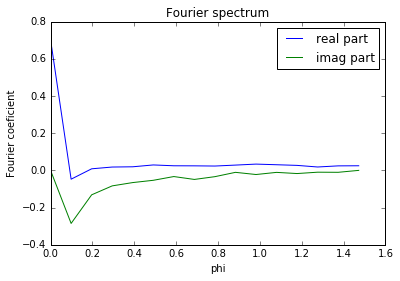

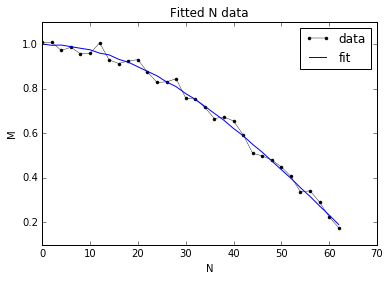

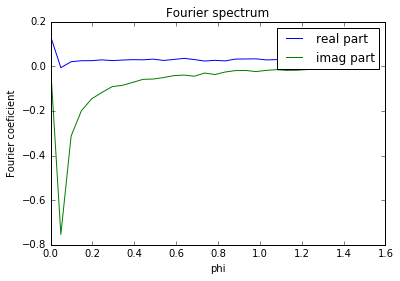

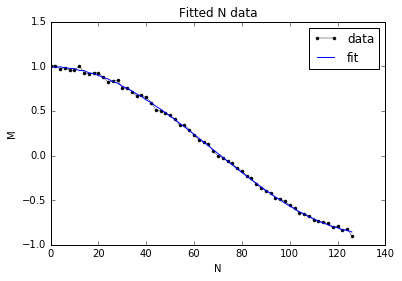

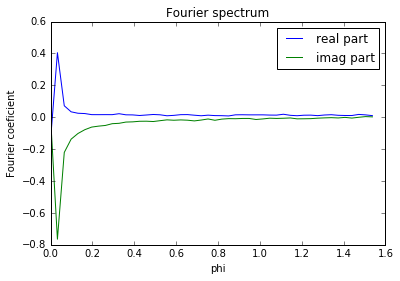

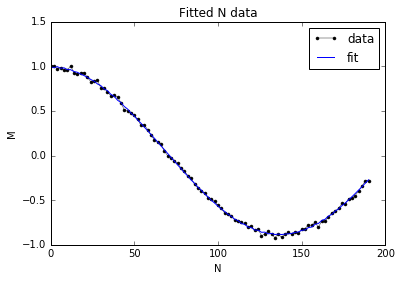

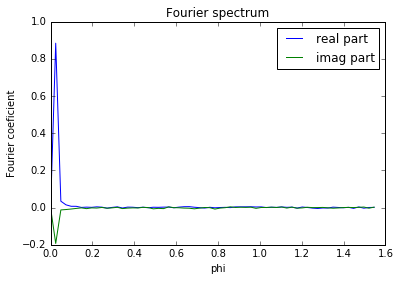

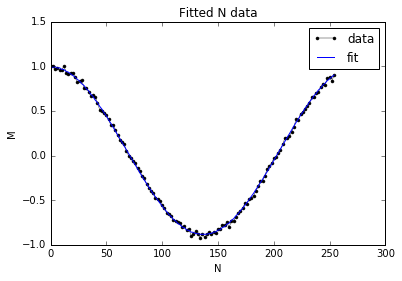

scaled_error <= error_tol:  True
scaled_error:  0.000366918072359
xs, phis, scaled_error:  [ 1.88832737  0.01211905] [ 0.02297268  1.4903153 ] 0.000366918072359


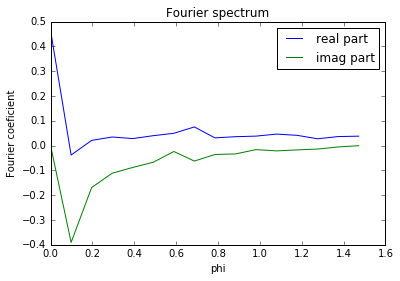

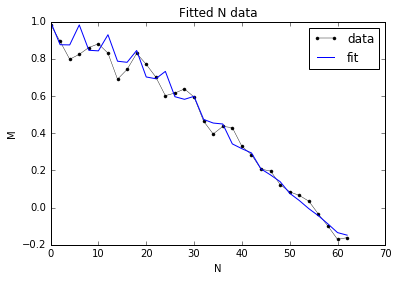

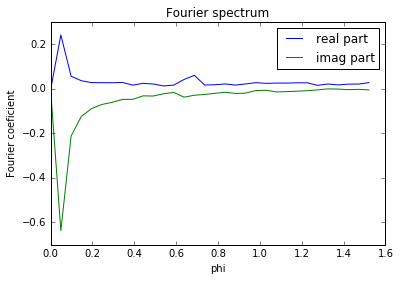

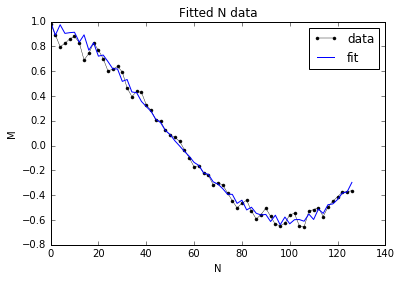

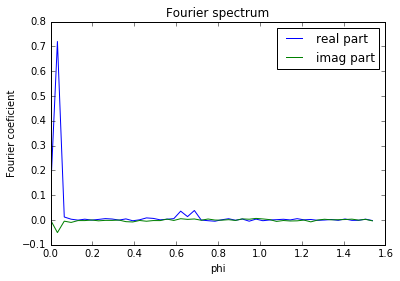

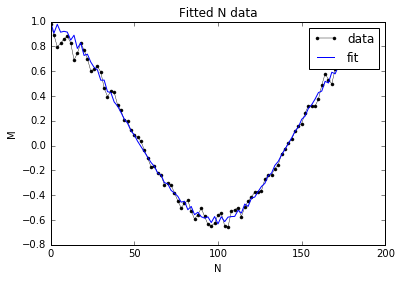

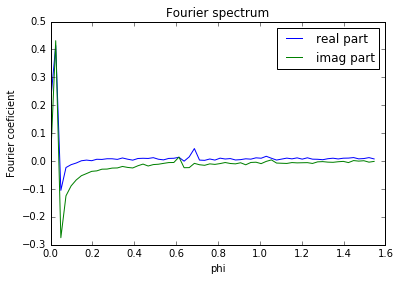

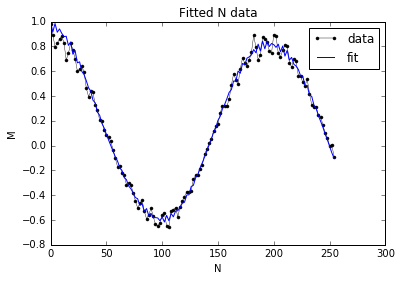

scaled_error <= error_tol:  False
scaled_error:  0.00255589929053
xs, phis, scaled_error:  [ 1.72300397  0.12267215  0.0857188   0.08415989] [ 0.03208485  0.04626738  0.02533711  1.42119244] 0.00255589929053


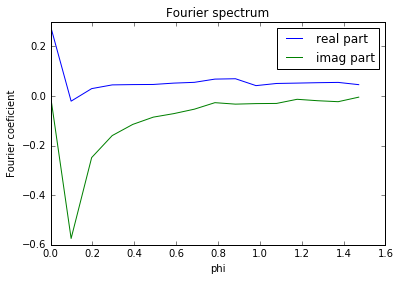

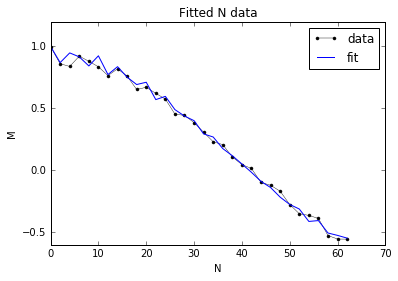

KeyboardInterrupt: 

In [148]:
%matplotlib inline
for dii in clf_dii:
    dip_ind = dip_inds[dii]
    spin_dict = analysis.analyze_dip(dip_ind, tau, data_func, omega_larmor, spin_dict, spins_per_dip = 2, N_vals = np.arange(0,256,2),
        error_tol = .1/64, verbose = True, plots = True)

In [133]:
guess_As, guess_Bs, dataerrs = analysis.choose_spin_guesses(spin_dict, N, omega_larmor, tau, data, x_min = 1.5, error_fun = analysis.squared_error)

In [134]:
cluster_As, cluster_Bs, cluster_dataerrs = analysis.cluster_spin_guesses(guess_As, guess_Bs, dataerrs, eps = .075, min_samples = 1)

In [135]:
As, Bs, num_remove = cluster_As, cluster_Bs, 1
while num_remove < 3:
    As, Bs, num_remove = analysis.remove_spins(As, Bs, N, omega_larmor, tau, data, num_remove = num_remove, error_fun = analysis.squared_error)

In [142]:
num_correct = 0
spins = set(zip(A_rand, np.abs(B_rand)))
for A, B in zip(As, np.abs(Bs)):
    for spin in spins:
        if learning.is_fit(A, B, spin, A_acc = .5, B_acc = 2):
            num_correct = num_correct + 1
            spins.remove(spin)
            break
print num_correct

13


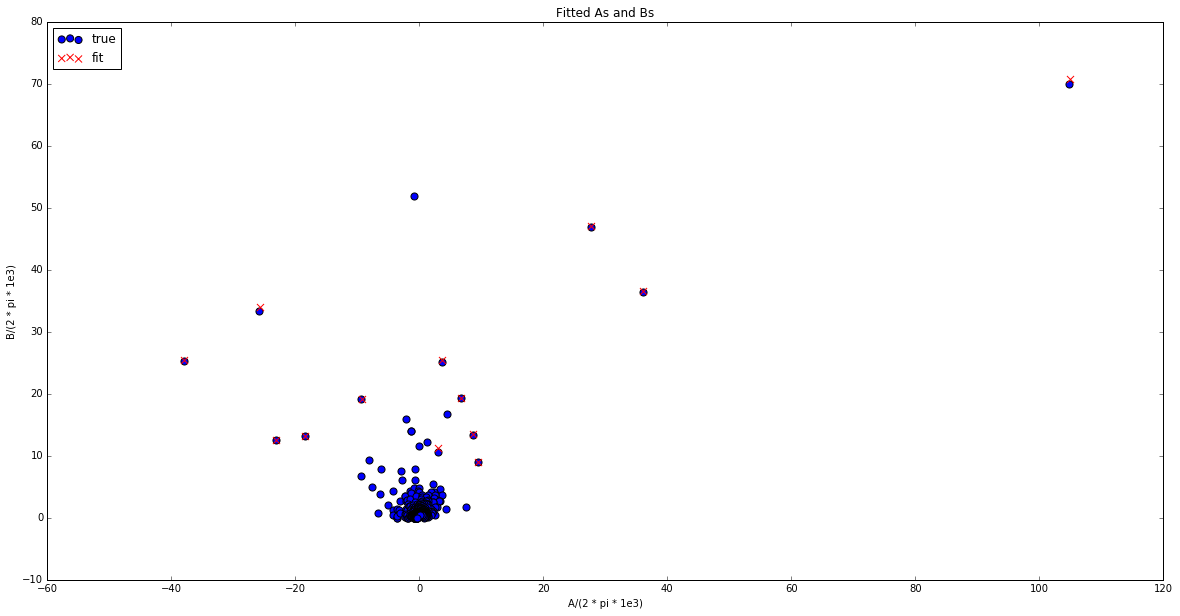

In [143]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("Fitted As and Bs")
plt.xlabel("A/(2 * pi * 1e3)")
plt.ylabel("B/(2 * pi * 1e3)")
plt.scatter(np.array(A_rand)/analysis.mag, np.array(np.abs(B_rand))/analysis.mag, c='b', marker = 'o', s = 50, label = 'true')
plt.scatter(np.array(As)/analysis.mag, np.array(np.abs(Bs))/analysis.mag, c='r', marker = 'x', s = 50, label = 'fit')
plt.legend(loc=2)
plt.show()

In [48]:
Bs

array([-445660.0626762 ,  -86601.8423235 , -121629.79988784,
       -296080.99832617, -121186.75580952, -217853.09318835,
        -79223.1658284 , -160265.91606562, -229693.17897446,
       -159655.31376261,  -83668.92052595, -322847.6447125 ,
        -88115.18020037, -339530.76718223,  -57963.18643121,
       -346522.39990487,  -57776.99087449])

In [139]:
np.linspace(0,1,5)[1:]

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [12]:
import learning
a = learning.load_obj("diamonds/diamond_19")